# Customer Personality Analysis

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch # to build dendrogram and build the plottin

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# DATA SET
df = pd.read_excel('marketing_campaign.xlsx')

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# THERE IS 24 NULL VALUES IN INCOME COLUMN
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# CALCULATION FOR CHECK HOW MANY PERCENTAGE OF NULL VALUES ARE PRESENT IN COLUMN
per = (len(df[df['Income'].isnull()])/len(df))*100
per

1.0714285714285714

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150

<Axes: >

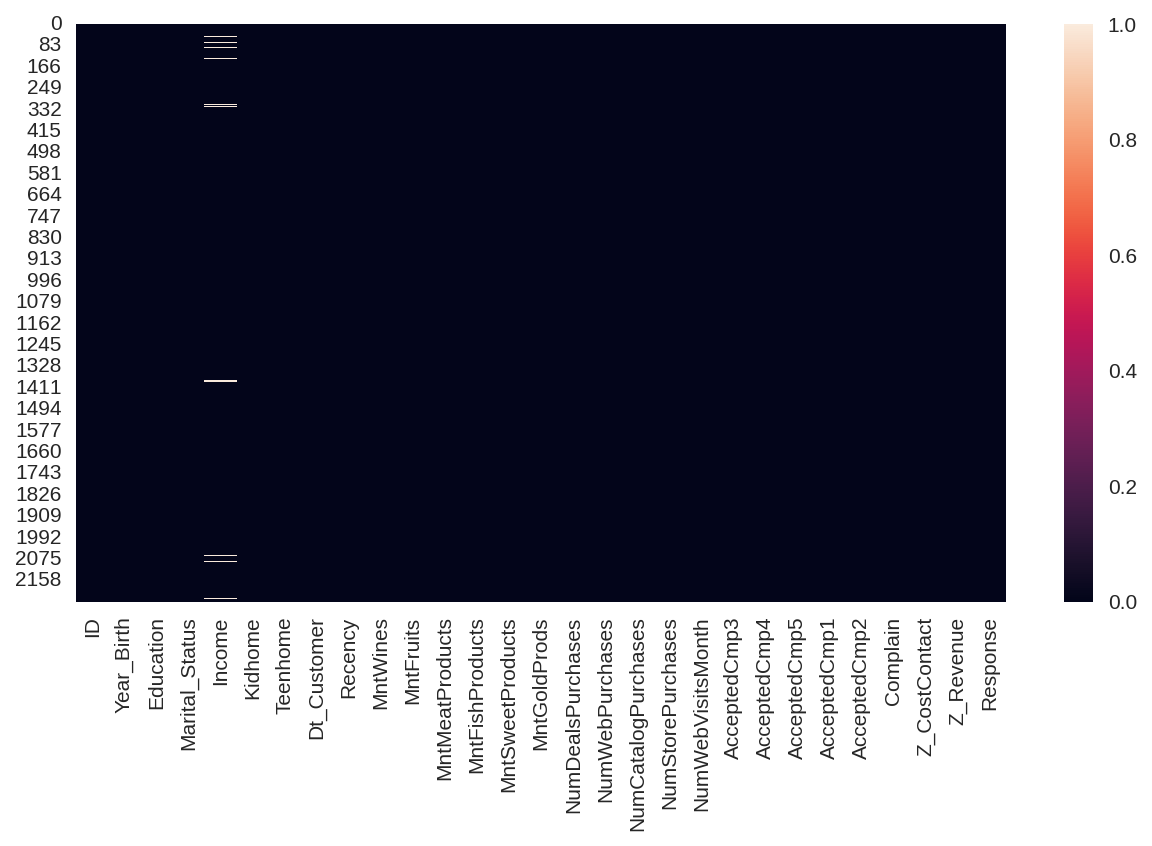

In [ ]:
# VISUALIZE NULL VALUES USING HEATMAP
sns.heatmap(df.isna())

In [ ]:
# REMOVE NULL VALUES
df.dropna(inplace=True)

<Axes: >

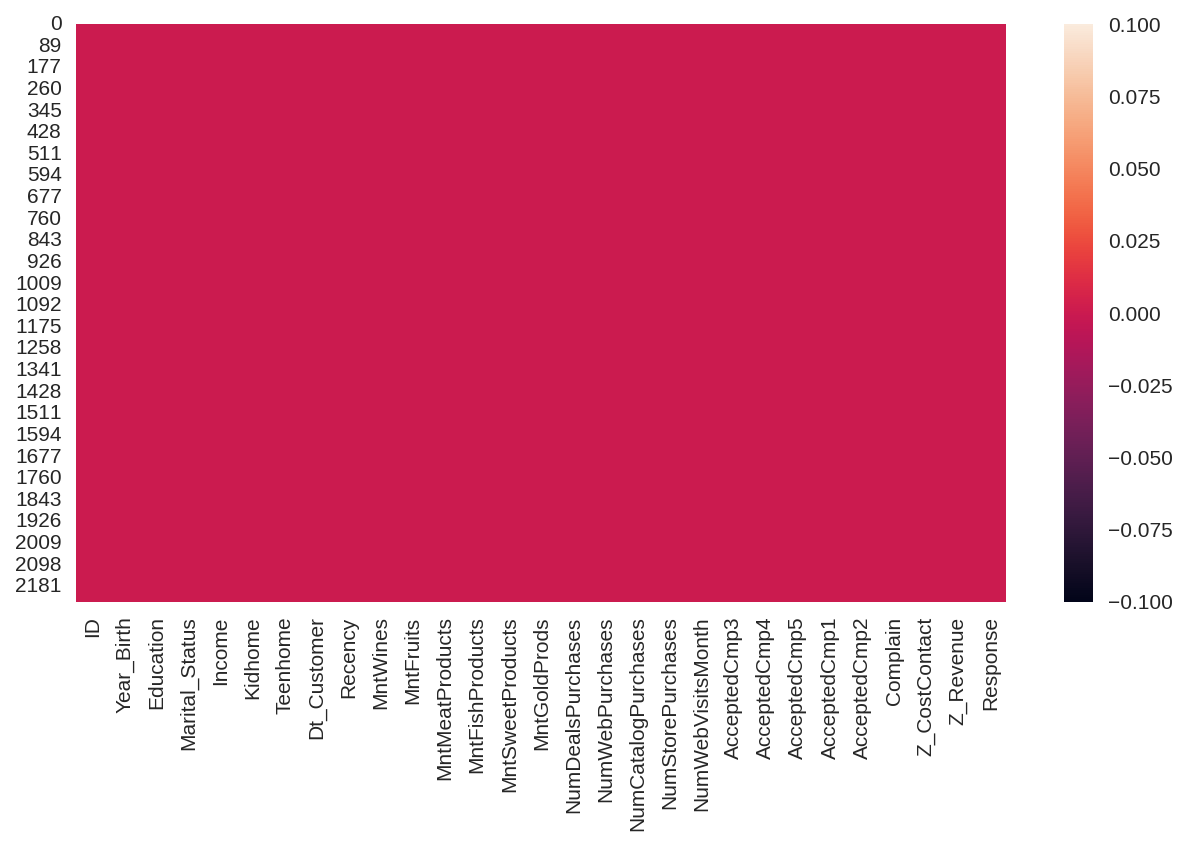

In [ ]:
# VISUALIZATION CLEAN DATA
sns.heatmap(df.isna())

In [ ]:
# NOW THERE IS NO NULL VALUES IN DATA
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# NO DUPLICATED RECORDS
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

# FEATURE ENGINEERING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
print(max(df['Dt_Customer']))
print(min(df['Dt_Customer']))

2014-06-29 00:00:00
2012-07-30 00:00:00


In [ ]:
df['Age'] = 2015 - df['Year_Birth']

In [ ]:
df['Expences'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expences']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Expences, Length: 2216, dtype: int64

In [ ]:
df['Marital_Status'].unique()
df['Living_with'] = df['Marital_Status'].replace({'Single':'Alone',
                                                  'Together':'Partner',
                                                  'Married':'Partner',
                                                  'Divorced':'Alone',
                                                  'Widow':'Alone',
                                                  'Absurd':'Alone',
                                                  'YOLO':'Alone'})

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df['Family_Size'] = df['Living_with'].replace({'Alone':1,'Partner':2}) + df['Children']

In [ ]:
df['Parents'] = np.where(df.Children > 0,1,0)

In [ ]:
df['Education'] = df['Education'].replace({'Graduation':'Graduate',
                                           'PhD':'Postgraduate',
                                           'Master':'Postgraduate',
                                           '2n Cycle':'Undergraduate',
                                           'Basic':'Undergraduate'})

In [ ]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

In [ ]:
df.head(3)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduate  58138.0        0         0       58       635         88   
1  Graduate  46344.0        1         1       38        11          1   
2  Graduate  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   

   AcceptedCmp2  Complain  Response  Age  Expences  Living_with  Children  \
0             0         0         1   58      1617        Alone         0   
1             0         0         0   61        27        Alone         2   
2             0         0         0   50       776      Partner         0   

   Family_Size  Parents  
0            1        0  
1            3        1  
2            2        0  

[3 rows x 29 columns]

# ANALYSIS AND VISUALIZATION

In [ ]:
df.shape

(2216, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [ ]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2216.000000  ...   2216.000000   2216.000000   2216.000000   
mean      43.965253  ...      0.073105      0.064079      0.013538   
std       51.815414  ...      0.260367      0.244950      0.115588   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        9.000000  ...      0.000000      0.000000      0.000000   
50%       24.500000  ...      0.000000      0.000000      0.000000   
75%       56.000000  ...      0.000000      0.000000      0.000000   
max      321.000000  ...      1.000000      1.000000      1.000000   

          Complain     Response          Age     Expences     Children  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean      0.009477     0.150271    46.179603   607.075361     0.947202   
std       0.096907     0.357417    11.985554   602.900476     0.749062   
min       0.000000     0.000000    19.000000     5.000000     0.000000   
25%       0.000000     0.000000    38.000000    69.000000     0.000000   
50%       0.000000     0.000000    45.000000   396.500000     1.000000   
75%       0.000000     0.000000    56.000000  1048.000000     1.000000   
max       1.000000     1.000000   122.000000  2525.000000     3.000000   

       Family_Size      Parents  
count  2216.000000  2216.000000  
mean      2.592509     0.714350  
std       0.905722     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 27 columns]

In [ ]:
df.describe(include=object).T

count unique       top  freq
Education    2216      3  Graduate  1116
Living_with  2216      2   Partner  1430

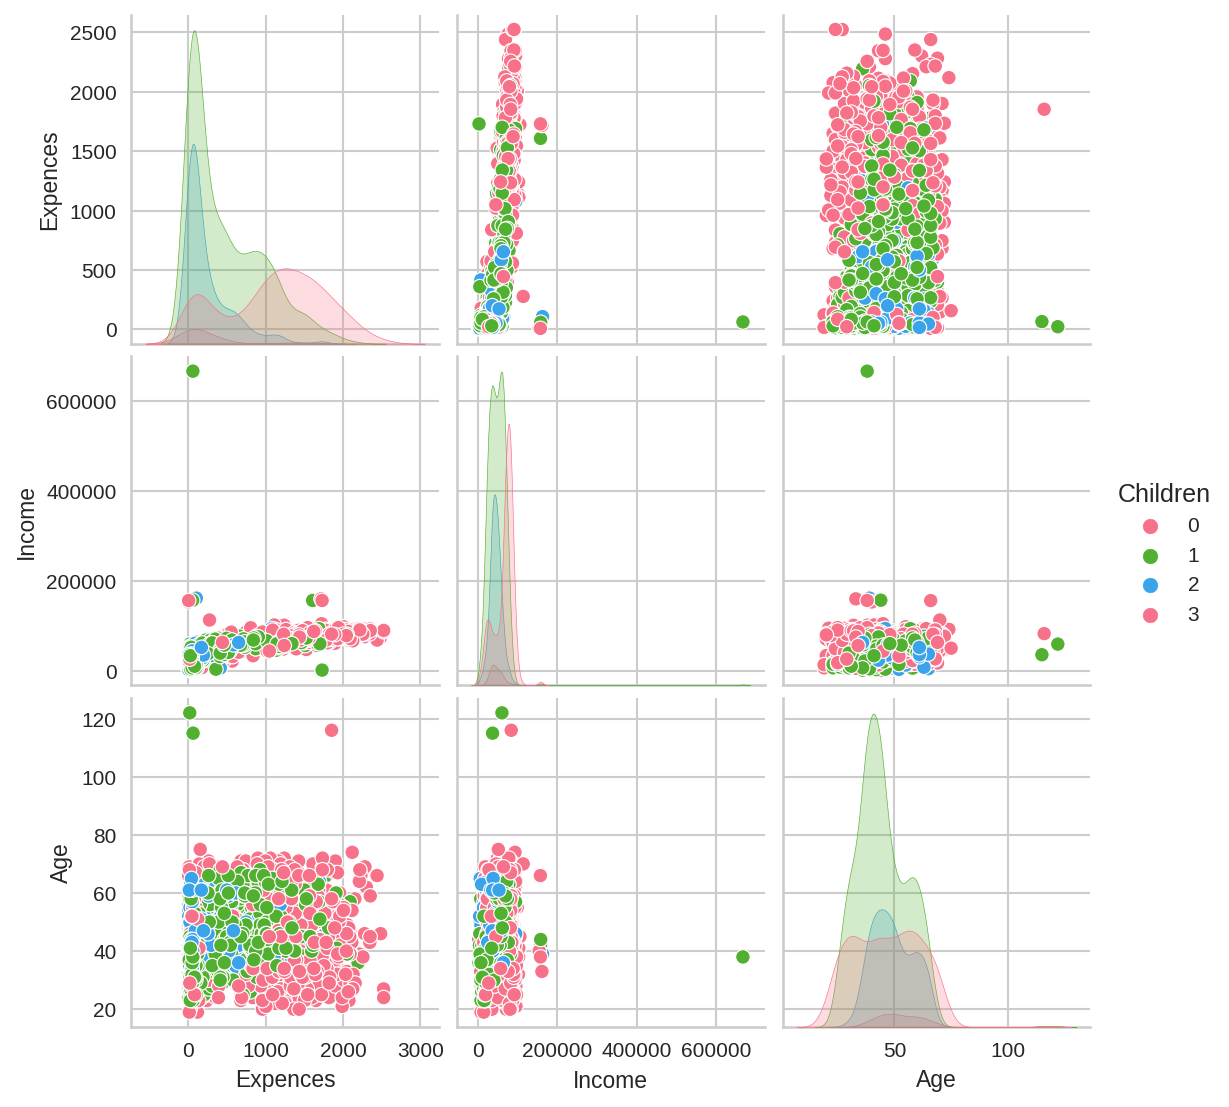

In [ ]:
sns.pairplot(df,vars=['Expences','Income','Age'],hue='Children',palette='husl')

<Axes: xlabel='Expences', ylabel='Income'>

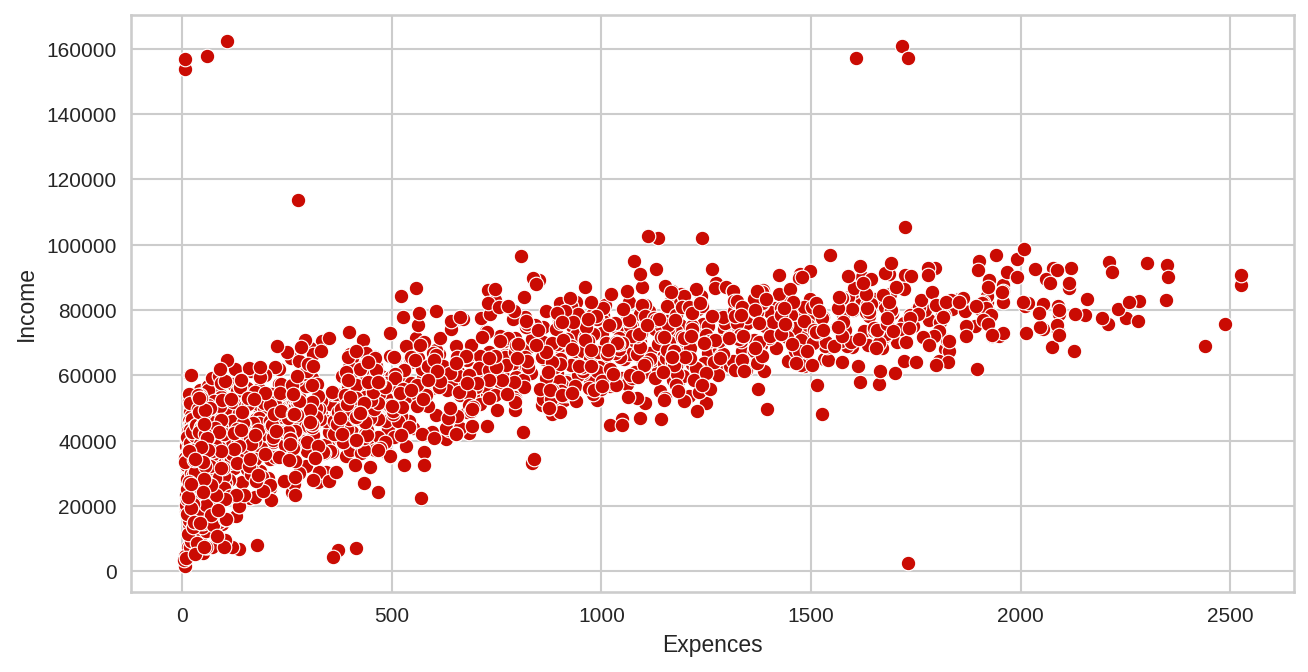

In [ ]:
sns.scatterplot(x=df[df['Income']<600000]['Expences'],y=df[df['Income']<600000]['Income'],color = 'r')

<Axes: xlabel='Expences', ylabel='Age'>

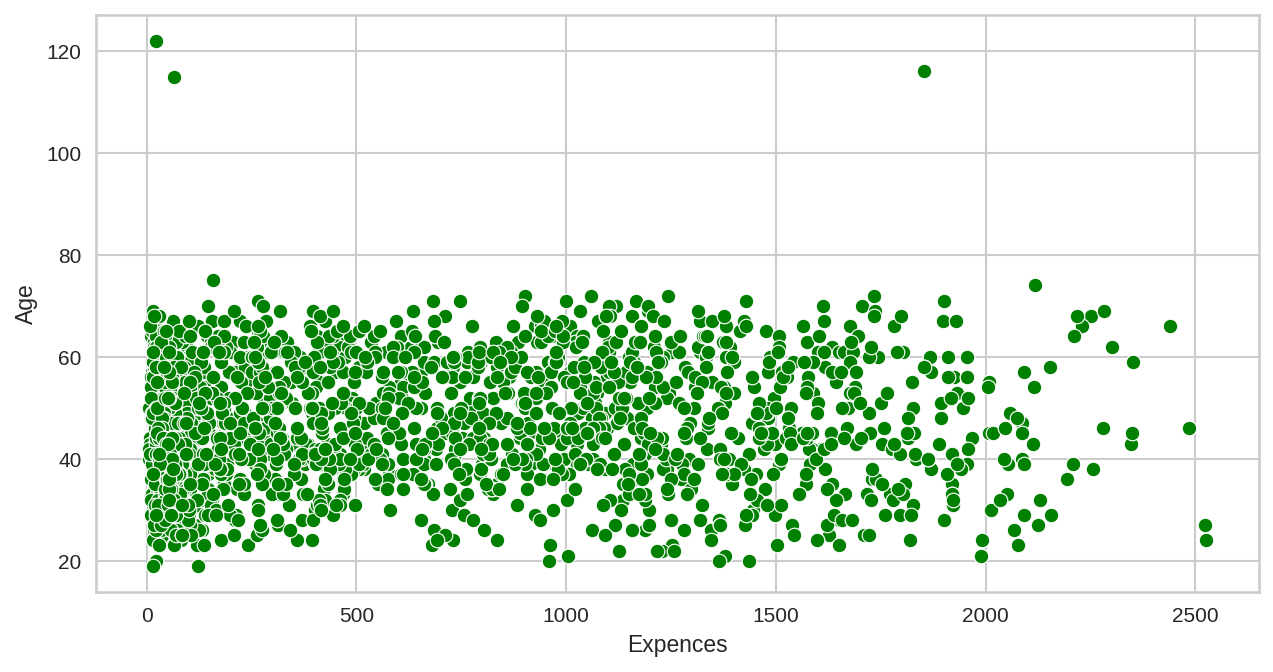

In [ ]:
sns.scatterplot(x=df['Expences'],y=df['Age'],color = 'green')

<Axes: xlabel='Expences', ylabel='Count'>

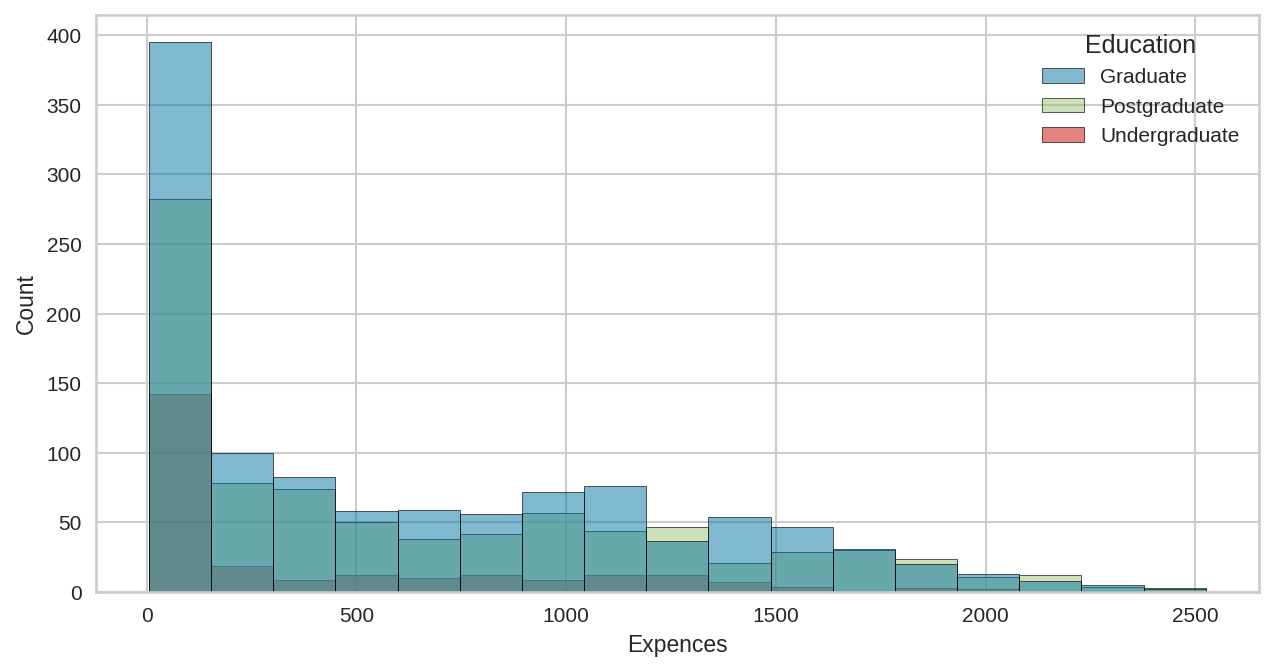

In [ ]:
sns.histplot(x=df['Expences'],hue=df['Education'])

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

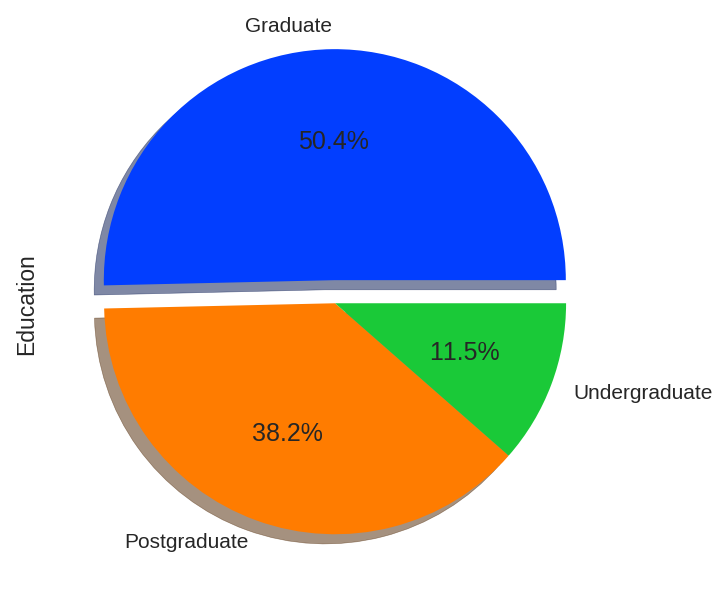

In [ ]:
df['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, colors=sns.color_palette('bright'));
df["Education"].value_counts()

# OUTLIER DETECTION

<Axes: >

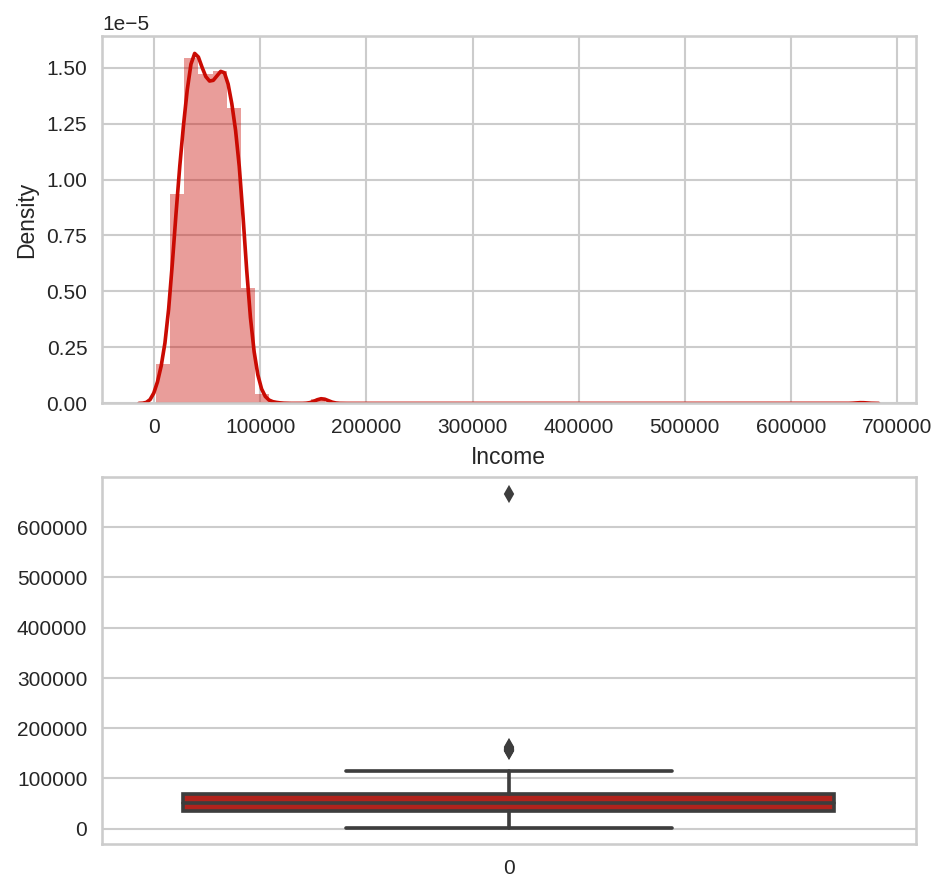

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (7,7))
sns.distplot(df['Income'],ax=ax1,color='r')
sns.boxplot(df['Income'],ax=ax2,color='r')

<Axes: >

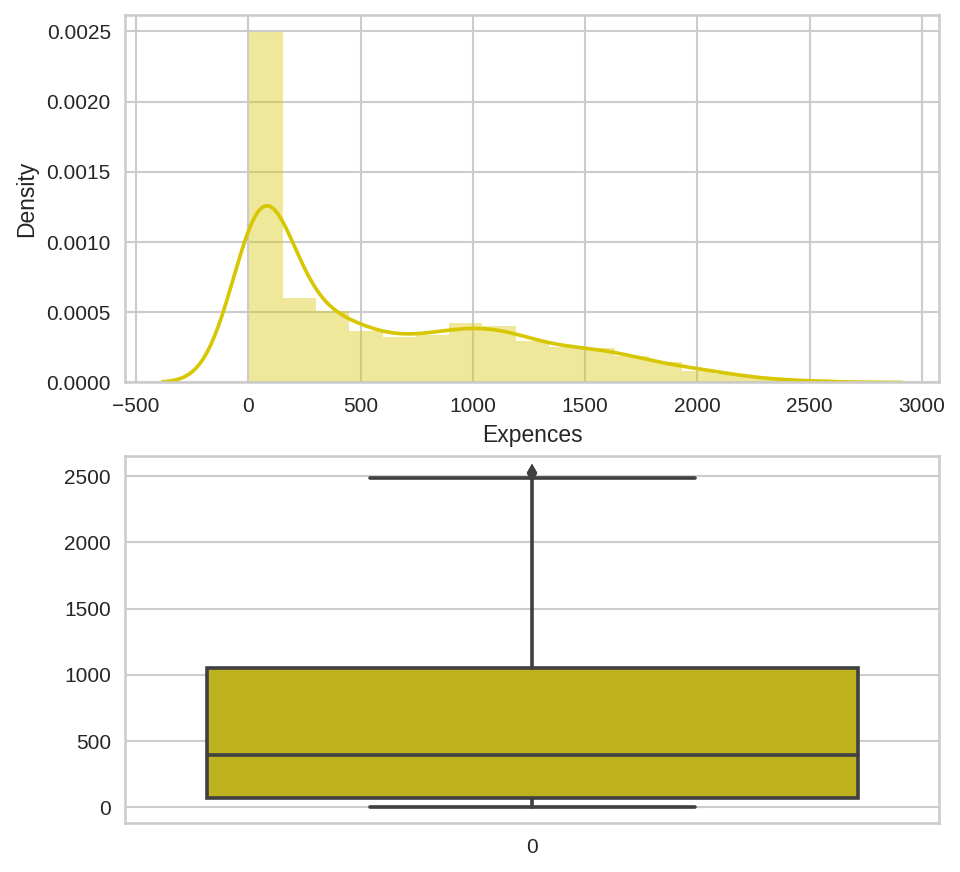

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (7,7))
sns.distplot(df['Expences'],ax=ax1,color='y')
sns.boxplot(df['Expences'],ax=ax2,color='y')

<Axes: >

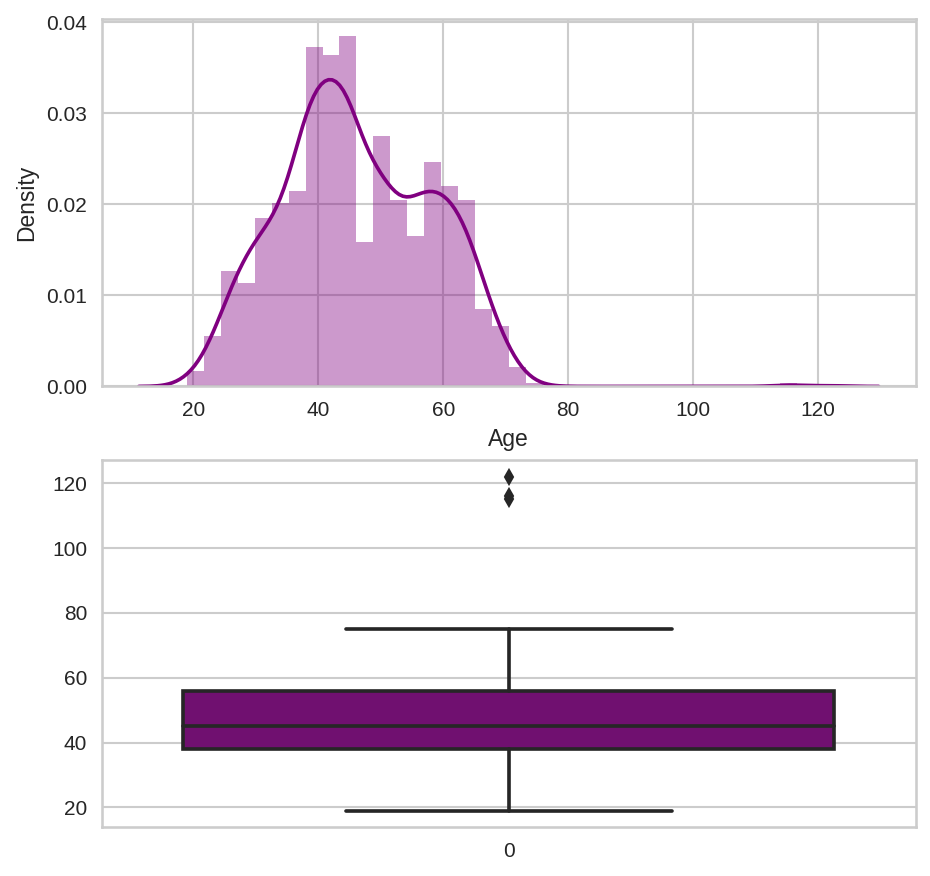

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (7,7))
sns.distplot(df['Age'],ax=ax1,color='Purple')
sns.boxplot(df['Age'],ax=ax2,color='Purple')

# TREATING OUTLIERS WITH CAPPING METHOD

In [ ]:
outlier_cols = ['Income','Expences','Age','Recency']
def detect_outliers(d):
    for i in d:
        Q3, Q1 = np.percentile(df[i], [75 ,25])
        IQR = Q3 - Q1

        uq = Q3+1.5*IQR
        lq = Q1-1.5*IQR

        outliers = df[i][(df[i] > uq) | (df[i] < lq)]
        print(f'***{i} outlier points***','\n',outliers,'\n')
detect_outliers(outlier_cols)

***Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

***Expences outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Expences, dtype: int64 

***Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

***Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 



In [ ]:
df.shape

(2216, 29)

In [ ]:
df = df[(df['Age'] < 100)]
df = df[(df['Income'] < 600000)]

In [ ]:
df['Expences'].max()

2525

In [ ]:
df.shape

(2212, 29)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

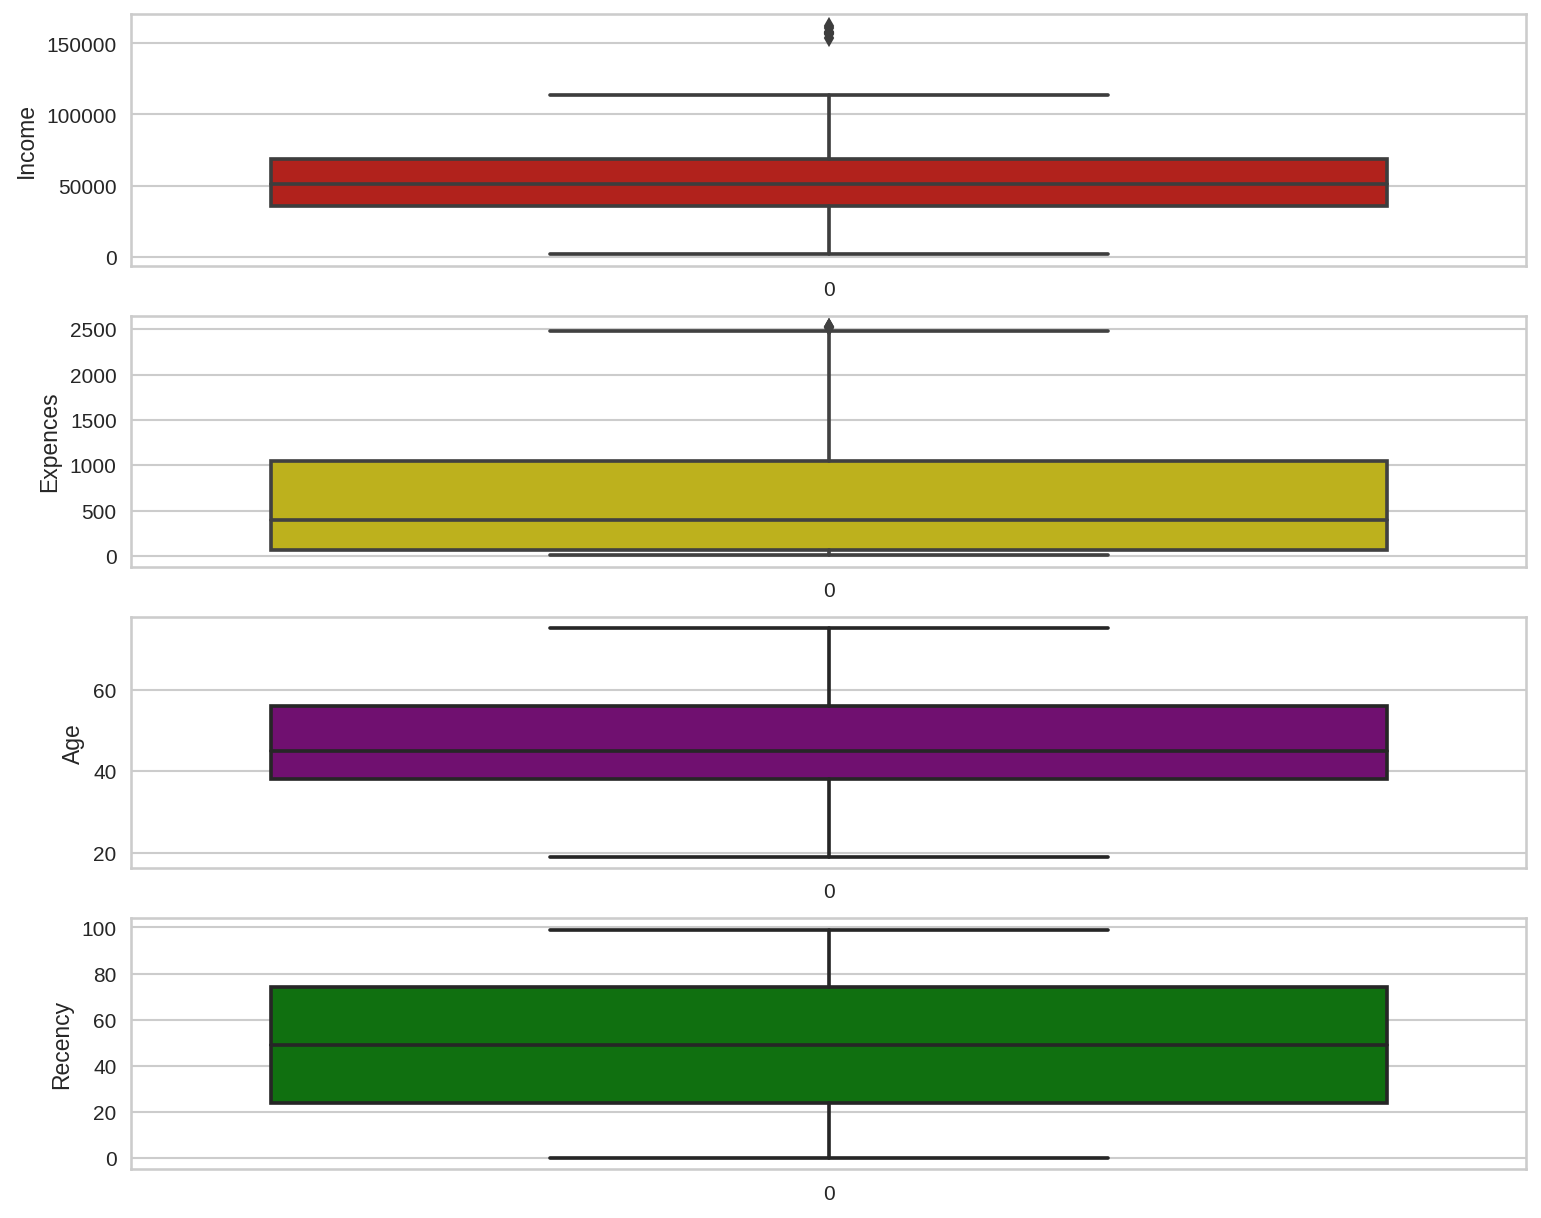

In [ ]:
# OUTLIERS REMOVED
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (12,10))
sns.boxplot(df['Income'],ax=ax1,color='r')
ax1.set_ylabel('Income')
ax1.set_xlabel('')

sns.boxplot(df['Expences'],ax=ax2,color='y')
ax2.set_ylabel('Expences')
ax2.set_xlabel('')

sns.boxplot(df['Age'],ax=ax3,color='purple')
ax3.set_ylabel('Age')
ax3.set_xlabel('')

sns.boxplot(df['Recency'],ax=ax4,color='green')
ax4.set_ylabel('Recency')
ax4.set_xlabel('')

plt.tight_layout

# ENCODING
FOR CATEGORICAL COLUMN

In [ ]:
df['Living_with'].unique()


array(['Alone', 'Partner'], dtype=object)

In [ ]:
df['Living_with'] = df['Living_with'].map({'Alone':0,'Partner':1})

In [ ]:
df['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [ ]:
df['Education'] = df['Education'].map({'Undergraduate':0,'Graduate':1,'Postgraduate':2})

In [ ]:
df['Education'] = df['Education'].astype(np.int64)
df['Expences'] = df['Expences'].astype(np.int64)
df['Living_with'] = df['Living_with'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

<Axes: >

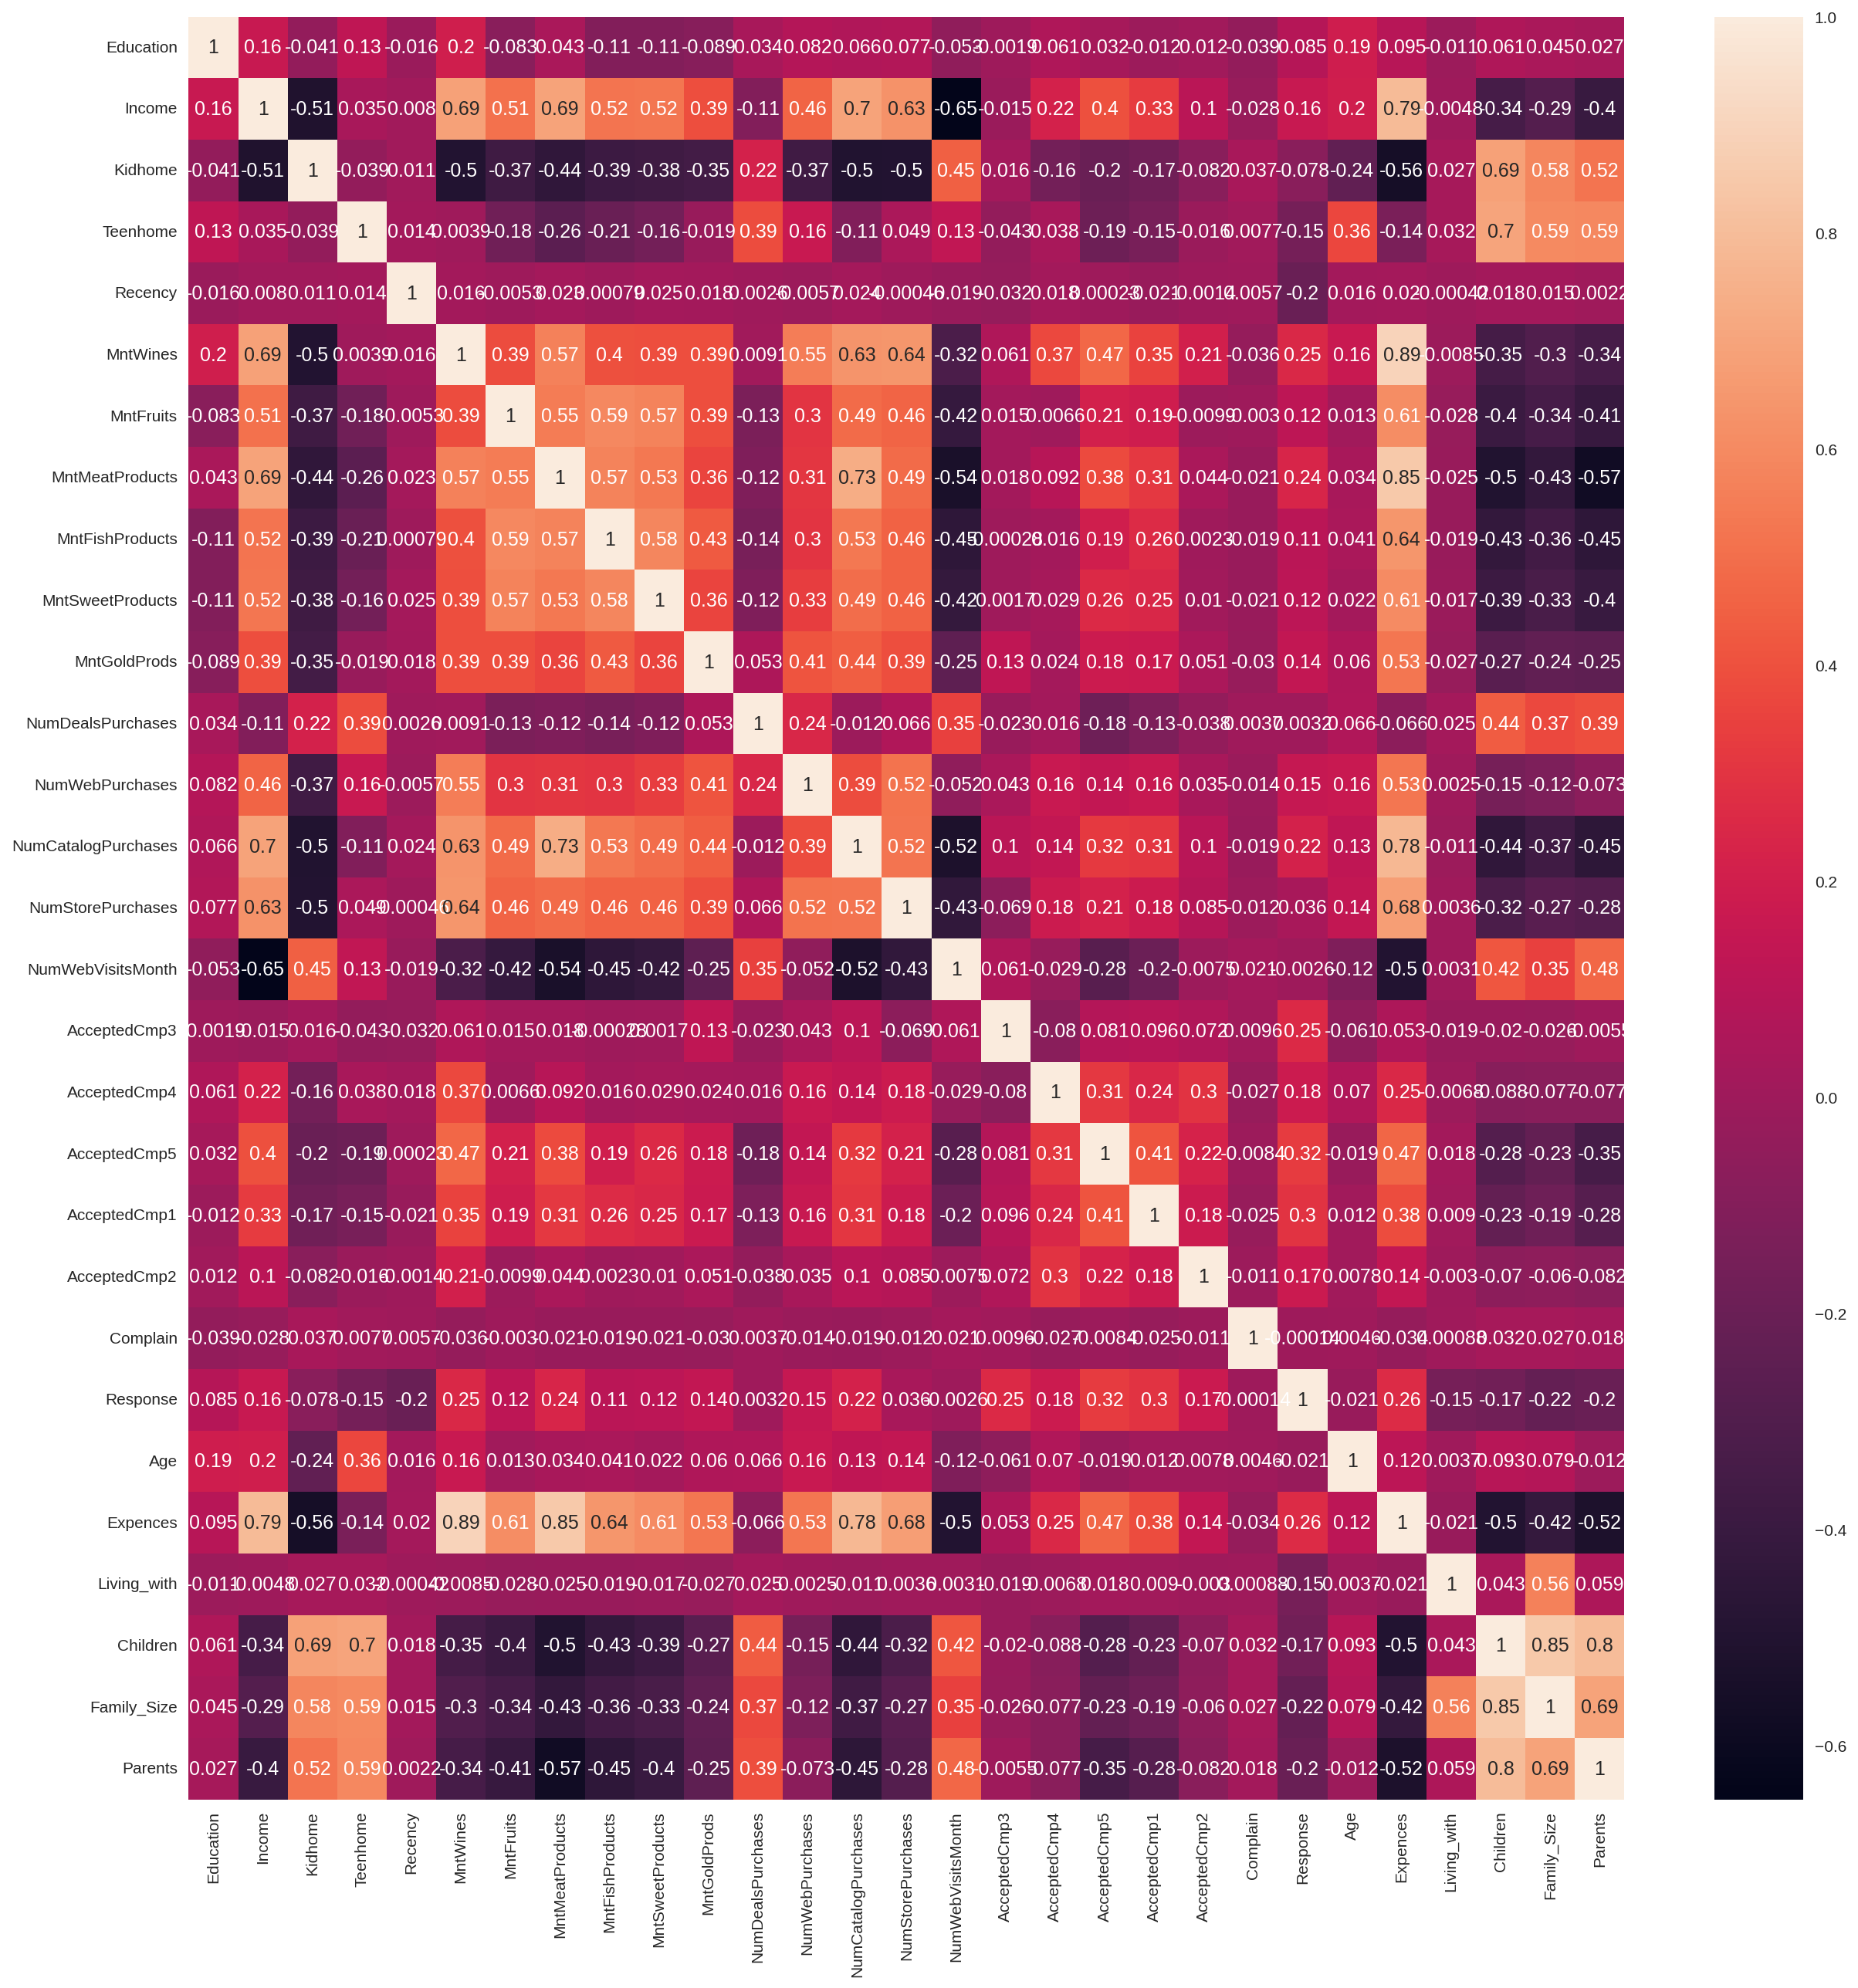

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

Education    Income   Kidhome  Teenhome   Recency  \
Education             1.000000  0.158032 -0.041275  0.125052 -0.016135   
Income                0.158032  1.000000 -0.514523  0.034565  0.007965   
Kidhome              -0.041275 -0.514523  1.000000 -0.039066  0.010623   
Teenhome              0.125052  0.034565 -0.039066  1.000000  0.014392   
Recency              -0.016135  0.007965  0.010623  0.014392  1.000000   
MntWines              0.195732  0.688209 -0.497203  0.003945  0.015981   
MntFruits            -0.082664  0.507354 -0.373258 -0.175905 -0.005257   
MntMeatProducts       0.042973  0.692279 -0.439031 -0.261134  0.022914   
MntFishProducts      -0.108035  0.520040 -0.388643 -0.205235  0.000788   
MntSweetProducts     -0.106725  0.523599 -0.377843 -0.163107  0.025244   
MntGoldProds         -0.088619  0.388299 -0.354922 -0.018579  0.018148   
NumDealsPurchases     0.033742 -0.108207  0.216594  0.386805  0.002591   
NumWebPurchases       0.082227  0.459265 -0.372327  0.162239 -0.005680   
NumCatalogPurchases   0.066261  0.696589 -0.504598 -0.112477  0.024197   
NumStorePurchases     0.077052  0.631424 -0.501863  0.049212 -0.000460   
NumWebVisitsMonth    -0.052848 -0.650257  0.447258  0.130985 -0.018965   
AcceptedCmp3         -0.001854 -0.015152  0.016135 -0.042797 -0.032361   
AcceptedCmp4          0.061034  0.219633 -0.162111  0.038168  0.017520   
AcceptedCmp5          0.031637  0.395569 -0.204582 -0.190119  0.000233   
AcceptedCmp1         -0.011522  0.327524 -0.174261 -0.145198 -0.021147   
AcceptedCmp2          0.011749  0.104036 -0.081911 -0.015633 -0.001429   
Complain             -0.039323 -0.027900  0.037067  0.007746  0.005713   
Response              0.084891  0.161387 -0.077901 -0.154402 -0.200114   
Age                   0.193320  0.199977 -0.237497  0.361932  0.015694   
Expences              0.095419  0.792740 -0.557949 -0.137964  0.020479   
Living_with          -0.011353 -0.004803  0.026898  0.032320 -0.000417   
Children              0.061240 -0.343529  0.688081  0.698199  0.018062   
Family_Size           0.044652 -0.286638  0.583250  0.594481  0.014717   
Parents               0.026783 -0.403132  0.520355  0.587993  0.002189   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education            0.195732  -0.082664         0.042973        -0.108035   
Income               0.688209   0.507354         0.692279         0.520040   
Kidhome             -0.497203  -0.373258        -0.439031        -0.388643   
Teenhome             0.003945  -0.175905        -0.261134        -0.205235   
Recency              0.015981  -0.005257         0.022914         0.000788   
MntWines             1.000000   0.385844         0.568081         0.396915   
MntFruits            0.385844   1.000000         0.546740         0.593038   
MntMeatProducts      0.568081   0.546740         1.000000         0.572986   
MntFishProducts      0.396915   0.593038         0.572986         1.000000   
MntSweetProducts     0.389583   0.571474         0.534624         0.583484   
MntGoldProds         0.391461   0.393459         0.357556         0.426299   
NumDealsPurchases    0.009117  -0.134191        -0.121128        -0.143147   
NumWebPurchases      0.553663   0.302301         0.306841         0.299428   
NumCatalogPurchases  0.634237   0.485611         0.733787         0.532241   
NumStorePurchases    0.640219   0.459875         0.486349         0.457885   
NumWebVisitsMonth   -0.321616  -0.417741        -0.539194        -0.446151   
AcceptedCmp3         0.061360   0.014644         0.018416        -0.000276   
AcceptedCmp4         0.373349   0.006598         0.091677         0.016058   
AcceptedCmp5         0.472889   0.208990         0.375252         0.194793   
AcceptedCmp1         0.351610   0.192417         0.313379         0.261712   
AcceptedCmp2         0.206309  -0.009924         0.043549         0.002322   
Complain            -0.036420  -0.002956        -0.021017        -0.019098   
Respon

# FEATURE SCALING

In [ ]:
df_old = df.copy()

In [ ]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)

In [ ]:
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [ ]:
df

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1     -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2     -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3     -0.411675 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4      1.123949  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   
...         ...       ...       ...       ...       ...       ...        ...   
2207  -0.411675  0.430444 -0.822754  0.908097 -0.104347  1.197084   0.419540   
2208   1.123949  0.560123  2.902796  0.908097  0.241237  0.298631  -0.662628   
2209  -0.411675  0.233347 -0.822754 -0.929699  1.450778  1.787156   0.545373   
2210   1.123949  0.803172 -0.822754  0.908097 -1.417564  0.363866   0.092373   
2211   1.123949  0.042290  1.040021  0.908097 -0.311697 -0.656159  -0.587128   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0            1.690293         2.453472          1.483713  ...   
1           -0.718230        -0.651004         -0.634019  ...   
2           -0.178542         1.339513         -0.147184  ...   
3           -0.655787        -0.504911         -0.585335  ...   
4           -0.218684         0.152508         -0.001133  ...   
...               ...              ...               ...  ...   
2207         0.066770         0.079461          2.213965  ...   
2208        -0.611184        -0.687527         -0.658360  ...   
2209         0.222878        -0.103155         -0.366260  ...   
2210         0.209498         0.773403          0.071892  ...   
2211        -0.472917        -0.651004         -0.634019  ...   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1.426865             2.503607          -0.555814   
1           -1.126420            -0.571340          -1.171160   
2            1.426865            -0.229679           1.290224   
3           -0.761665            -0.913000          -0.555814   
4            0.332600             0.111982           0.059532   
...               ...                  ...                ...   
2207         1.791619             0.111982          -0.555814   
2208         1.426865            -0.229679          -0.248141   
2209        -0.761665             0.111982           2.213242   
2210         0.697355             0.795303           1.290224   
2211        -0.396910            -0.571340          -0.555814   

      NumWebVisitsMonth       Age  Expences  Living_with  Children  \
0              0.692181  1.018352  1.676245    -1.349603 -1.264598   
1             -0.132545  1.274785 -0.963297    -1.349603  1.404572   
2             -0.544908  0.334530  0.280110     0.740959 -1.264598   
3              0.279818 -1.289547 -0.920135     0.740959  0.069987   
4             -0.132545 -1.033114 -0.307562     0.740959  0.069987   
...                 ...       ...       ...          ...       ...   
2207          -0.132545  0.163575  1.218061     0.740959  0.069987   
2208           0.692181  1.958607 -0.271040     0.740959  2.739158   
2209           0.279818 -1.033114  1.052052    -1.349603 -1.264598   
2210          -0.957271  1.103830  0.391336     0.740959  0.069987   
2211           0.692181  1.274785 -0.722584     0.740959  1.404572   

      Family_Size   Parents  
0       -1.758359 -1.581139  
1        0.449070  0.632456  
2       -0.654644 -1.581139  
3        0.449070  0.632456  
4        0.449070  0.632456  
...           ...       ...  
2207     0.449070  0.632456  
2208     2.656499  0.632456  
2209    -1.758359 -1.581139  
2210     0.449070  0.632456  
2211     1.552784  0.632456  

[2212 rows x 22 columns]

# DIMENSIONALITY REDUCTION (PCA)

In [ ]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [ ]:
pcs = pca.components_.T
pcs

array([[ 1.13472184e-02,  1.40707751e-01, -5.07005123e-01],
       [ 2.79487158e-01,  1.78251581e-01, -7.49497092e-02],
       [-2.46222609e-01,  5.25315135e-03,  2.83235670e-01],
       [-9.87089263e-02,  4.62083399e-01, -1.51852530e-01],
       [ 3.52658237e-03,  1.62593442e-02,  3.60211684e-02],
       [ 2.55717081e-01,  2.09388533e-01, -1.16963123e-01],
       [ 2.38397562e-01,  1.09946505e-02,  2.53447319e-01],
       [ 2.85461994e-01,  9.90289368e-03,  7.63873616e-02],
       [ 2.48709712e-01,  2.33254617e-04,  2.53709659e-01],
       [ 2.37301989e-01,  2.16728756e-02,  2.57964459e-01],
       [ 1.88380372e-01,  1.23081416e-01,  1.99335052e-01],
       [-7.82600885e-02,  3.48736410e-01,  1.52504444e-01],
       [ 1.67559860e-01,  2.96796386e-01,  2.34360254e-02],
       [ 2.77349138e-01,  1.05952902e-01,  1.67198484e-02],
       [ 2.41543028e-01,  2.05508521e-01, -7.21300418e-03],
       [-2.25949609e-01,  4.60683817e-02,  9.03948047e-02],
       [ 3.84647362e-02,  2.34785745e-01

In [ ]:
pd.DataFrame(pcs,index=df.columns,columns=('PC1','PC2','PC3'))

PC1       PC2       PC3
Education            0.011347  0.140708 -0.507005
Income               0.279487  0.178252 -0.074950
Kidhome             -0.246223  0.005253  0.283236
Teenhome            -0.098709  0.462083 -0.151853
Recency              0.003527  0.016259  0.036021
MntWines             0.255717  0.209389 -0.116963
MntFruits            0.238398  0.010995  0.253447
MntMeatProducts      0.285462  0.009903  0.076387
MntFishProducts      0.248710  0.000233  0.253710
MntSweetProducts     0.237302  0.021673  0.257964
MntGoldProds         0.188380  0.123081  0.199335
NumDealsPurchases   -0.078260  0.348736  0.152504
NumWebPurchases      0.167560  0.296796  0.023436
NumCatalogPurchases  0.277349  0.105953  0.016720
NumStorePurchases    0.241543  0.205509 -0.007213
NumWebVisitsMonth   -0.225950  0.046068  0.090395
Age                  0.038465  0.234786 -0.428767
Expences             0.320099  0.133701  0.037430
Living_with         -0.027576  0.125503  0.300342
Children            -0.248087  0.339323  0.092651
Family_Size         -0.219730  0.346883  0.235189
Parents             -0.242808  0.292279  0.081817

In [ ]:
pd.DataFrame(pca.explained_variance_,index=range(1,4),columns=['Variability'])

Variability
1     8.274656
2     2.920914
3     1.430602

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_,index=range(1,4),columns=['Variability Ratio'])

Variability Ratio
1           0.375951
2           0.132709
3           0.064998

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_.cumsum(),index=range(1,4),columns=['Cumulitive Sum Of Variability Ratio'])

Cumulitive Sum Of Variability Ratio
1                             0.375951
2                             0.508660
3                             0.573657

Text(0, 0.5, 'Variance')

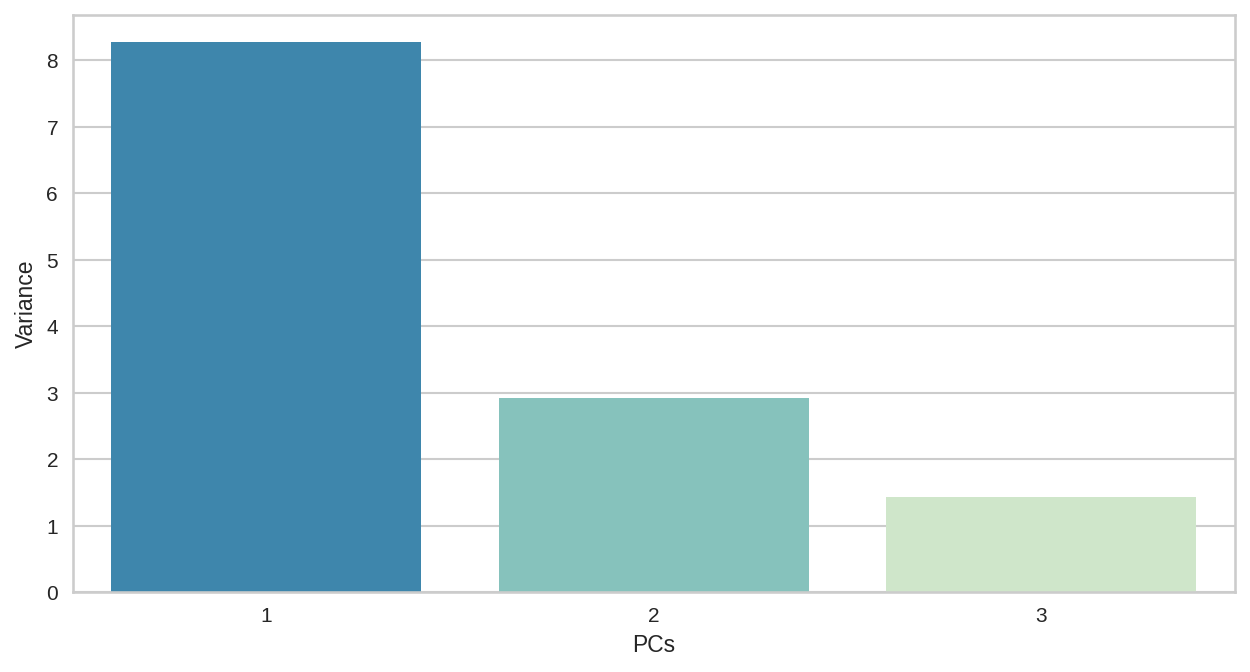

In [ ]:
sns.barplot(x = list(range(1,4)),y = pca.explained_variance_,palette = 'GnBu_r')
plt.xlabel('PCs')
plt.ylabel('Variance')

In [ ]:
df_pca = pd.DataFrame(pca.transform(df),columns=['PC1','PC2','PC3'])

<Axes: >

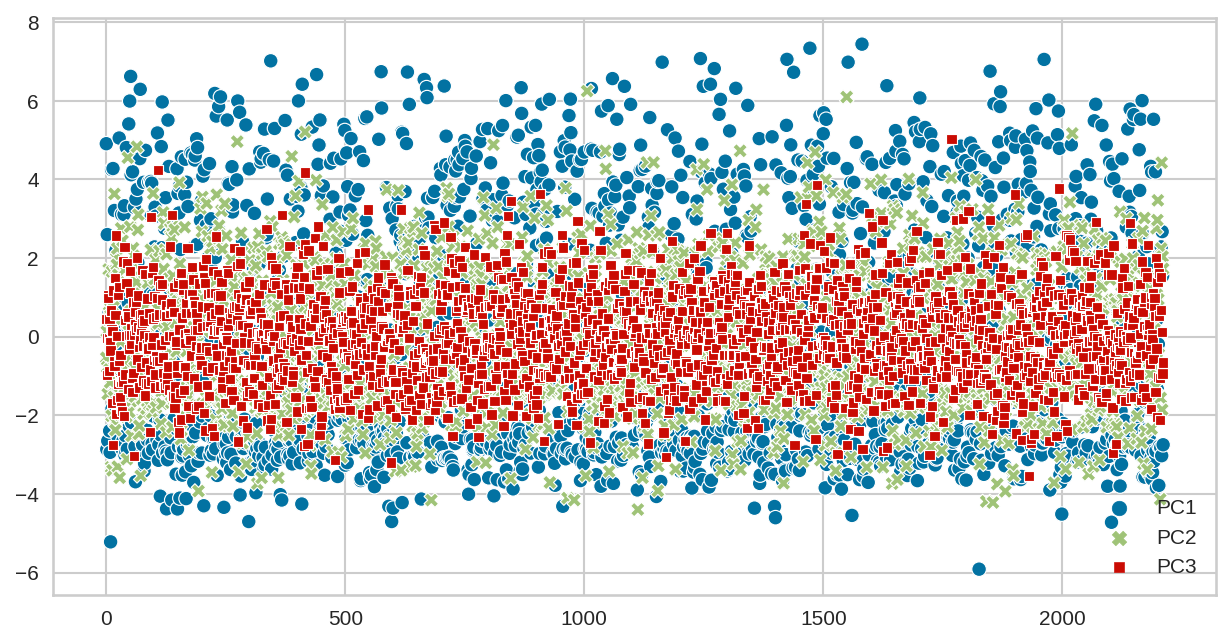

In [ ]:
sns.scatterplot(data=df_pca)

In [ ]:
df_pca.describe().T

count          mean       std       min       25%       50%       75%  \
PC1  2212.0  5.139550e-17  2.876570 -5.915032 -2.548036 -0.784933  2.418554   
PC2  2212.0 -1.284887e-17  1.709068 -4.398432 -1.343458 -0.133380  1.243116   
PC3  2212.0  2.730386e-17  1.196079 -3.542307 -0.864665 -0.015112  0.824643   

          max  
PC1  7.441146  
PC2  6.248100  
PC3  5.036931

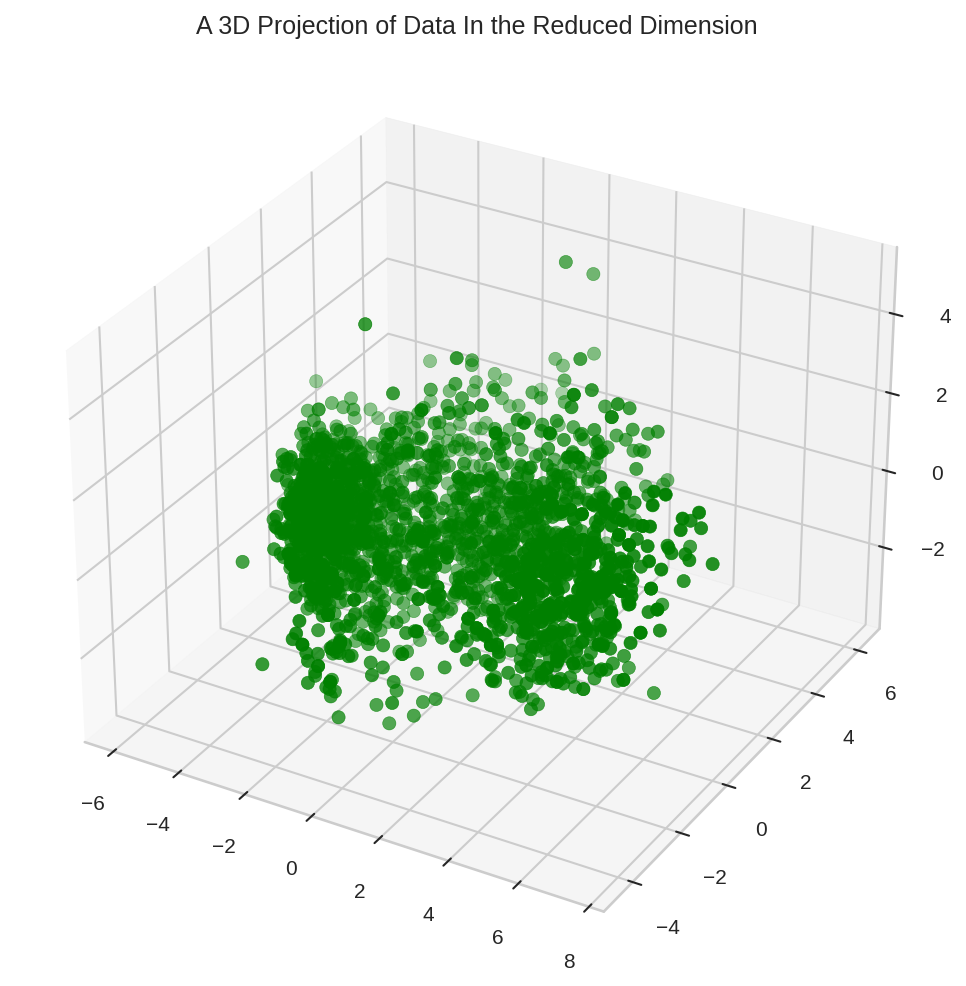

In [ ]:
x = df_pca['PC1']
y = df_pca['PC2']
z = df_pca['PC3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d', label='bla')
ax.scatter(x,y,z, s=40, c='green', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

# CLUSTERING

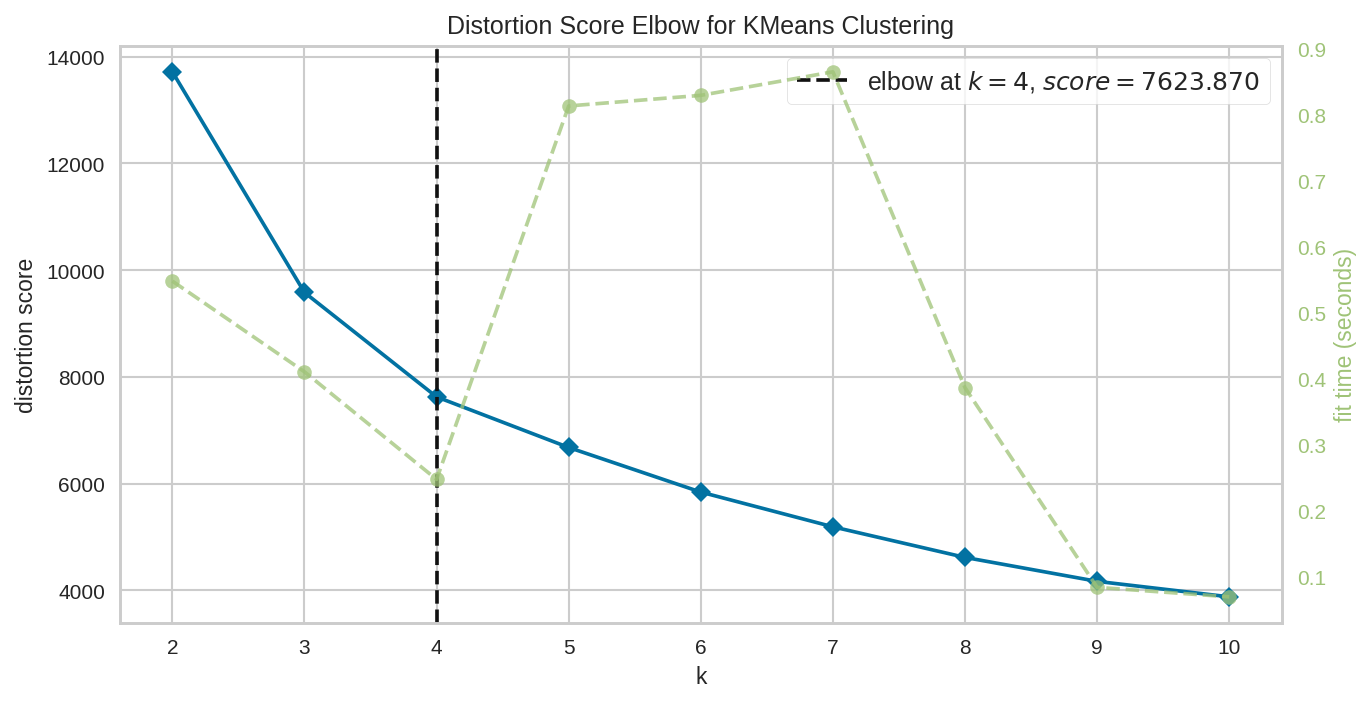

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show();

In [ ]:
hc = AgglomerativeClustering(n_clusters=4)
ylabel = hc.fit_predict(df_pca)
# ADDING CLUSTER COLUMN IN ALL DATASETS
df_pca['Clusters'] = ylabel
df['Clusters'] = ylabel
df_old['Clusters'] = ylabel

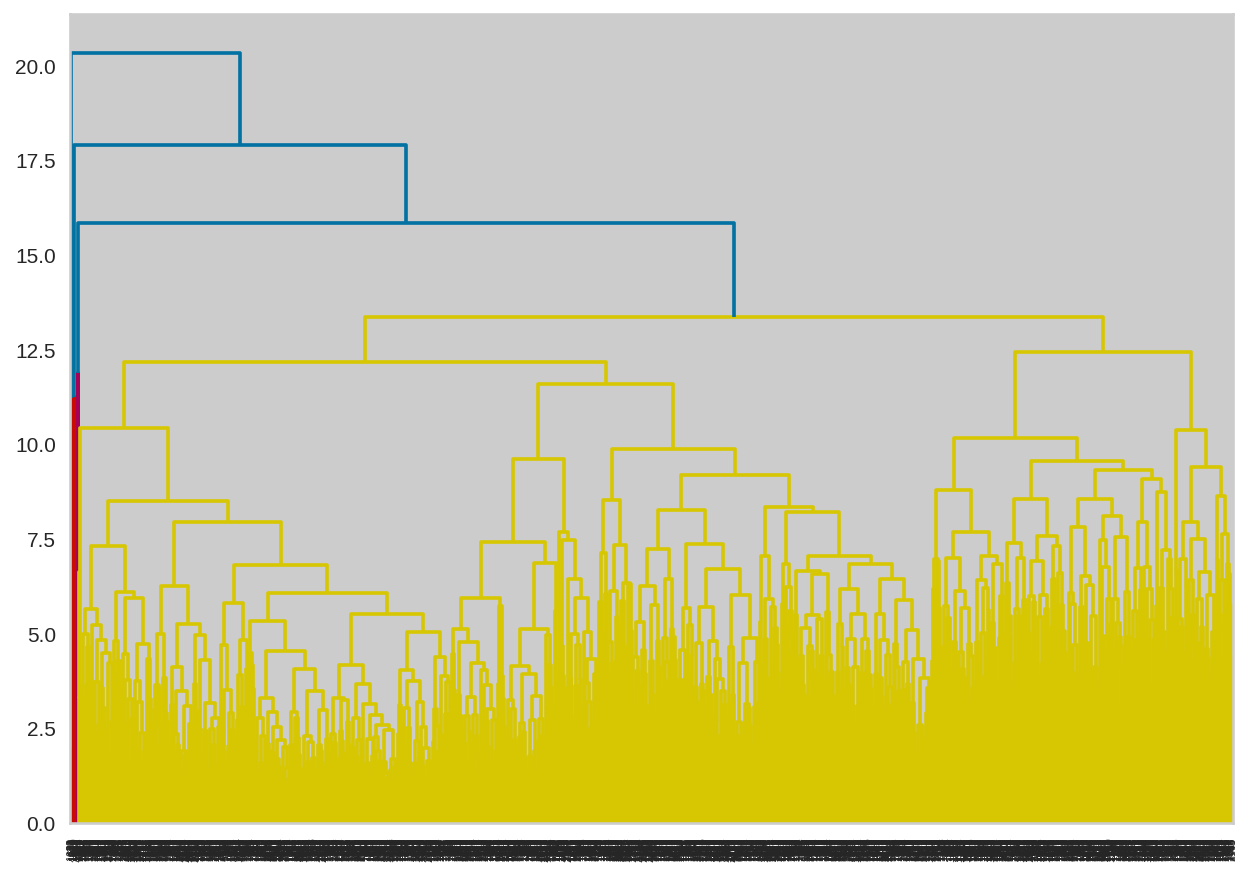

In [ ]:
# Create Dendrograms
plt.figure(figsize=(10, 7))
dendograms=sch.dendrogram(sch.linkage(df,'complete'))

Text(0.5, 1.0, 'Cluster Counts')

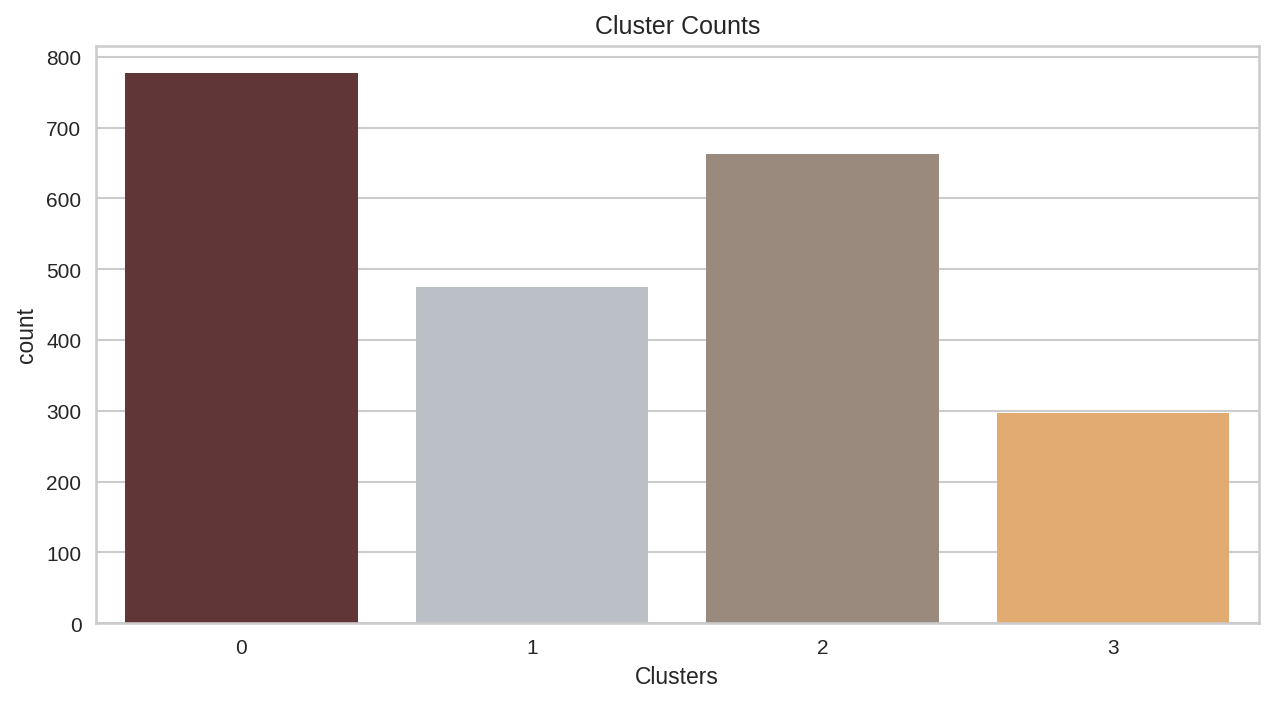

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
#check the distribution of the clusters
cplot = sns.countplot(x = df['Clusters'] , palette = pal)
cplot.set_title('Cluster Counts')

0    777
2    663
1    475
3    297
Name: Clusters, dtype: int64

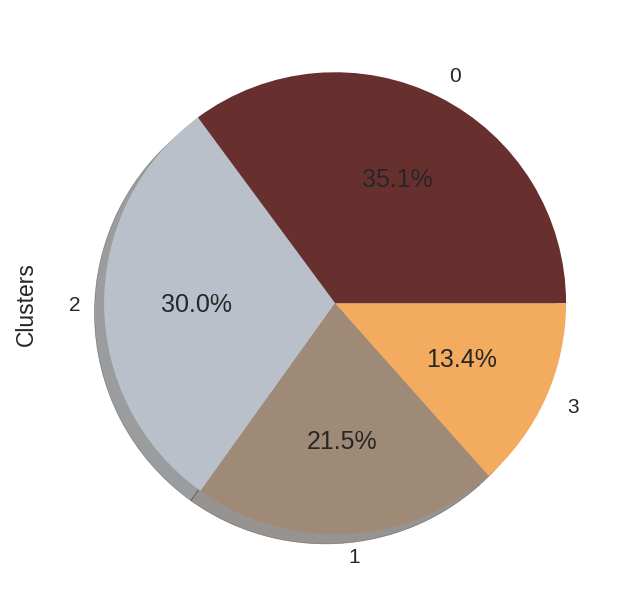

In [ ]:
df['Clusters'].value_counts().plot.pie(x=[1,0,0], autopct='%1.1f%%', shadow=True, colors=sns.color_palette(pal));
df['Clusters'].value_counts()

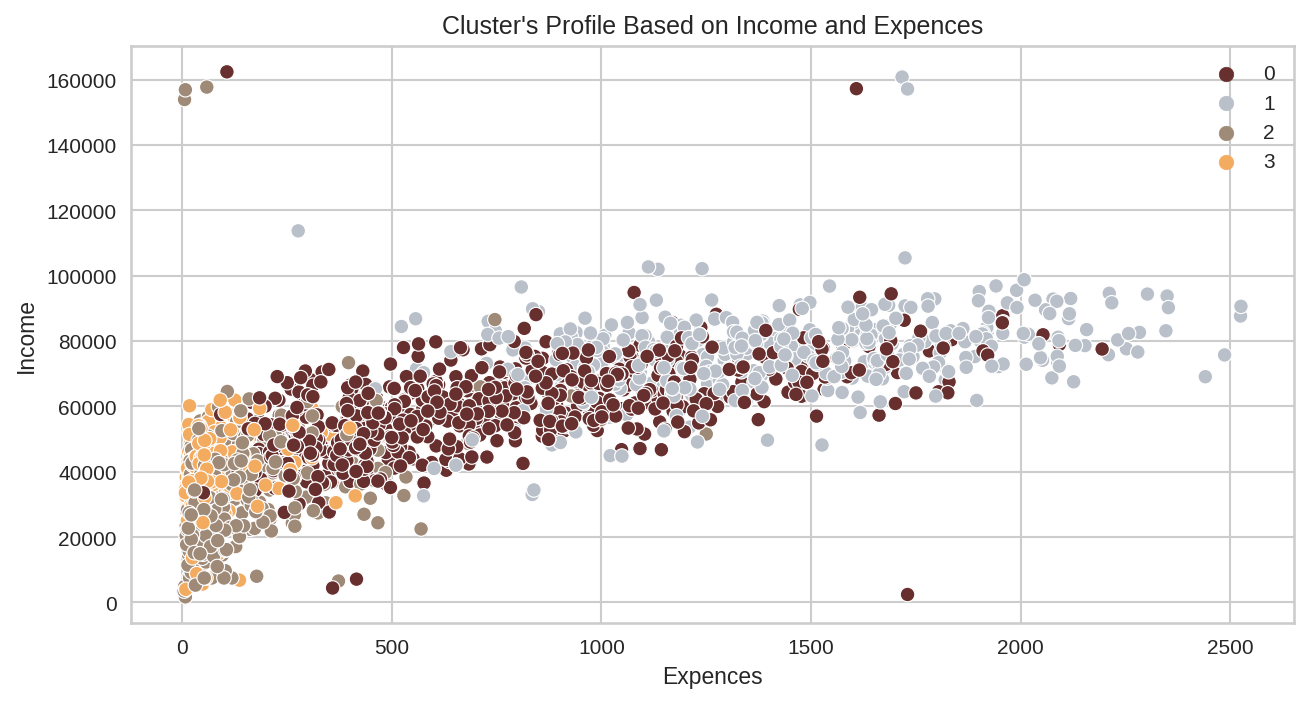

In [ ]:
#check if there is a clear distinction between clusters with reference to income and total amount spent
pl = sns.scatterplot(data=df_old, x=df_old['Expences'], y=df_old['Income'], hue=df_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Expences")
plt.legend();
plt.show()

## **Income vs spending plot shows the clusters pattern**
- Cluster 0: low income & low spending
- Cluster 1: average income & high spending
- Cluster 2: high income & high spending
- Cluster 3: low income & high spending

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

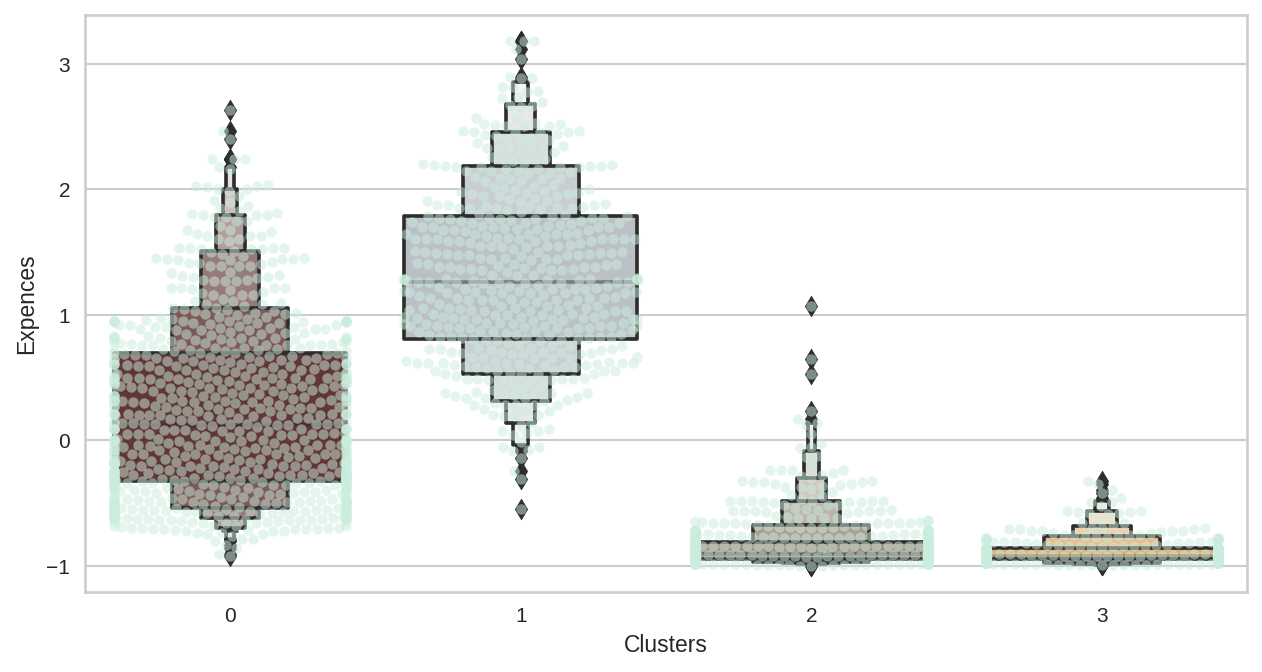

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df['Clusters'], y=df['Expences'], color= "#CBEDDD", alpha=0.5)
pl=sns.boxenplot(x=df['Clusters'], y=df['Expences'], palette = pal)
plt.show()

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

<Figure size 1500x750 with 0 Axes>

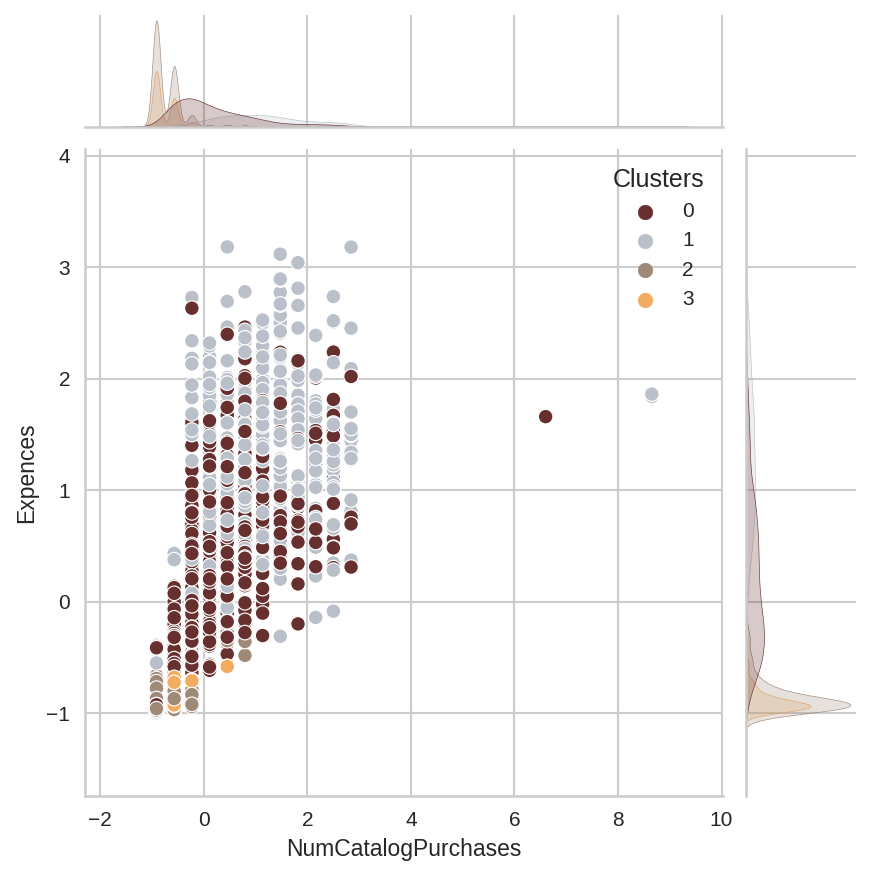

<Figure size 1500x750 with 0 Axes>

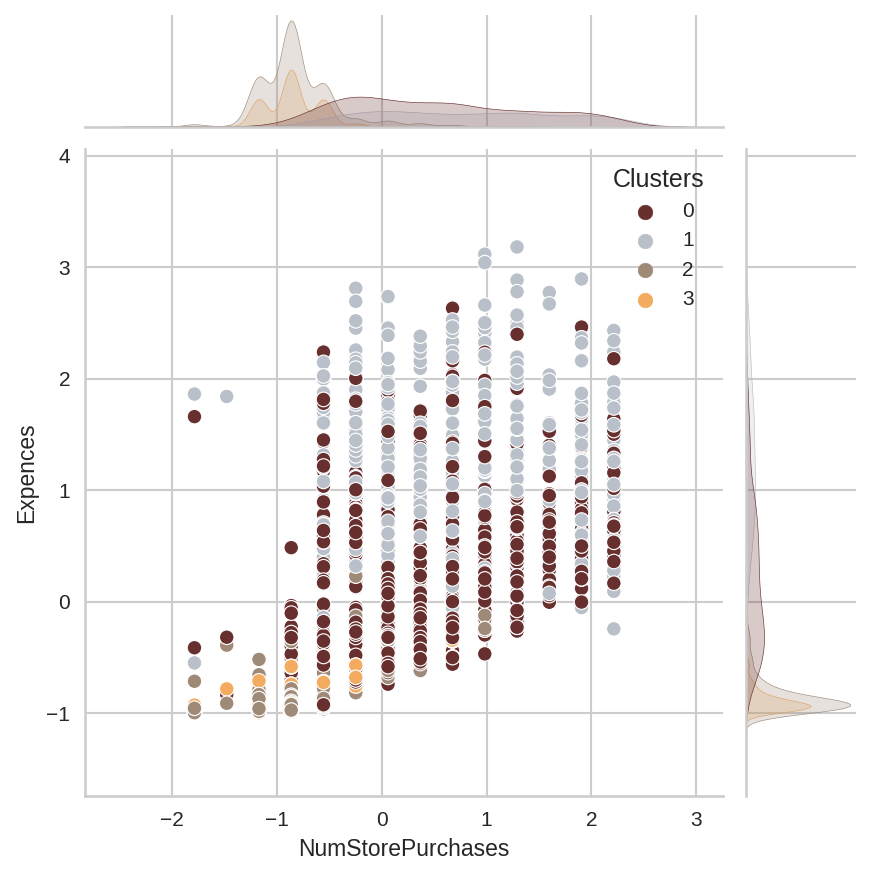

<Figure size 1500x750 with 0 Axes>

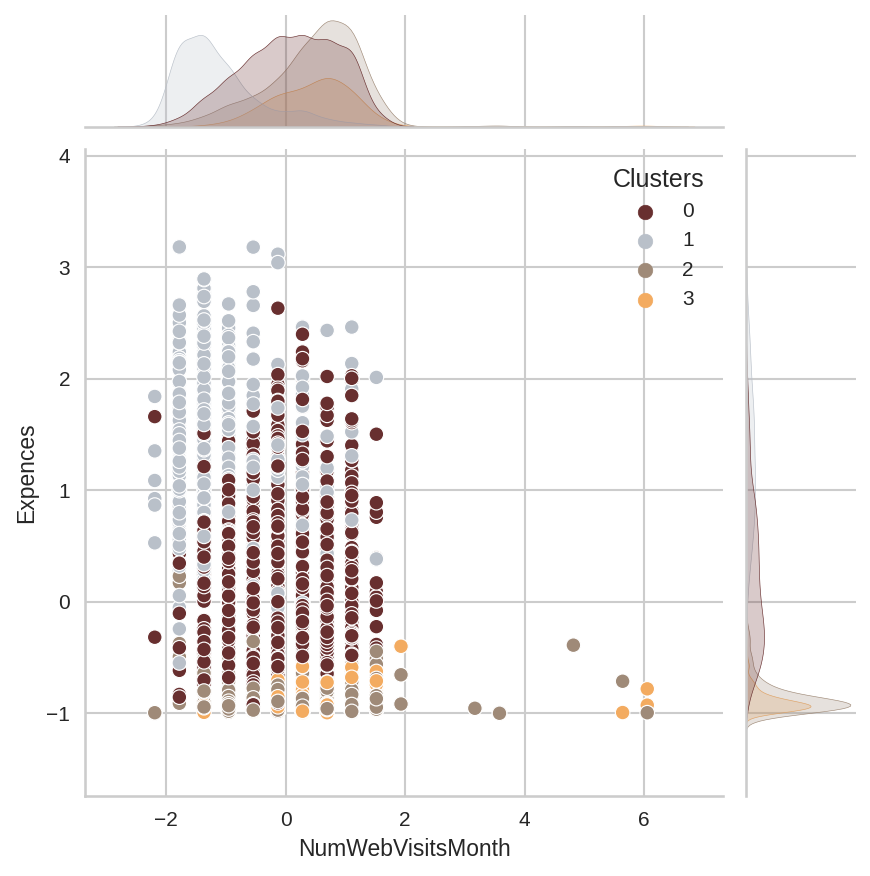

<Figure size 1500x750 with 0 Axes>

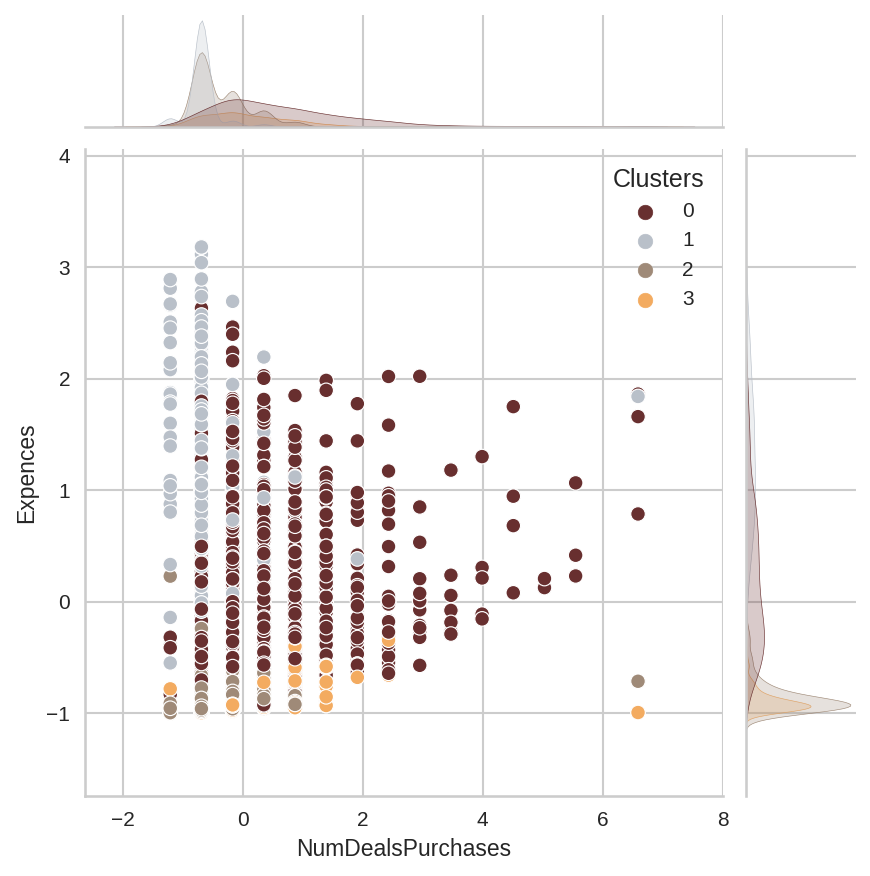

<Figure size 1500x750 with 0 Axes>

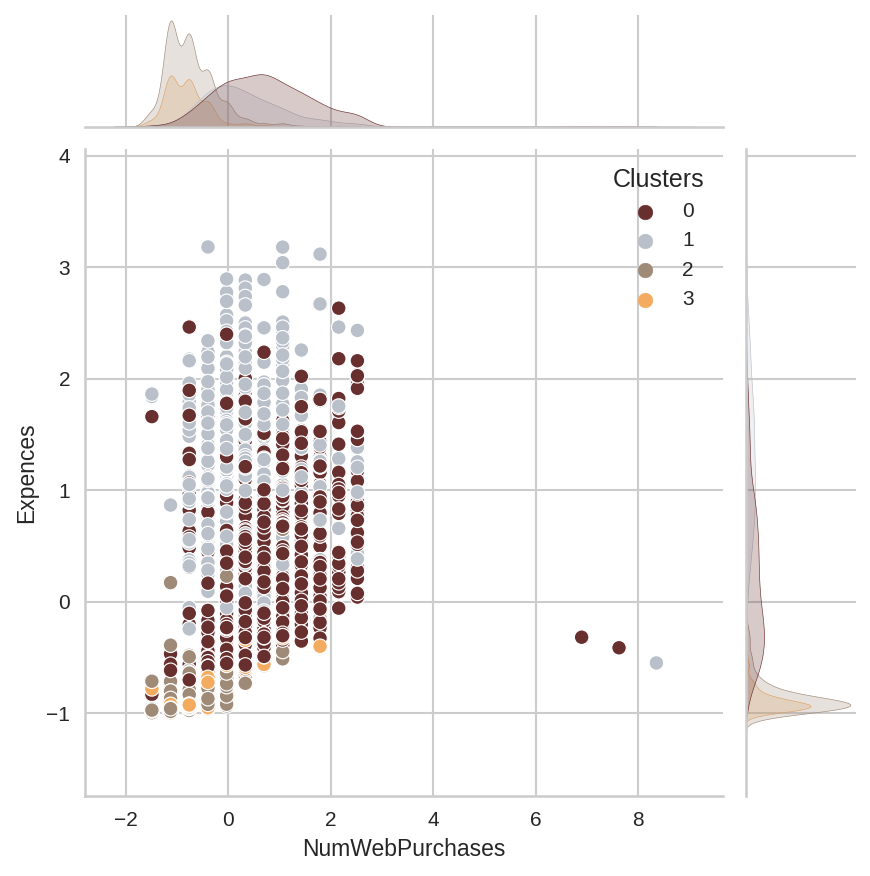

In [ ]:
#Used ratios to better compare the mode of purchase between the clusters
purchases = ["NumCatalogPurchases", 'NumStorePurchases',"NumWebVisitsMonth", "NumDealsPurchases", "NumWebPurchases"]

for i in purchases:
    plt.figure()
    sns.jointplot(x = df[i], y=df['Expences'], hue = df["Clusters"],palette=pal)
    plt.show()

# PROFILING

Let's take a deeper look at each cluster's individuals now that we have built the clusters and looked at their shopping patterns. To accomplish this, we will analyse each cluster in order to identify which consumers are the most valuable to us and which ones the marketing department of the retail business should focus on more.

<Figure size 1500x750 with 0 Axes>

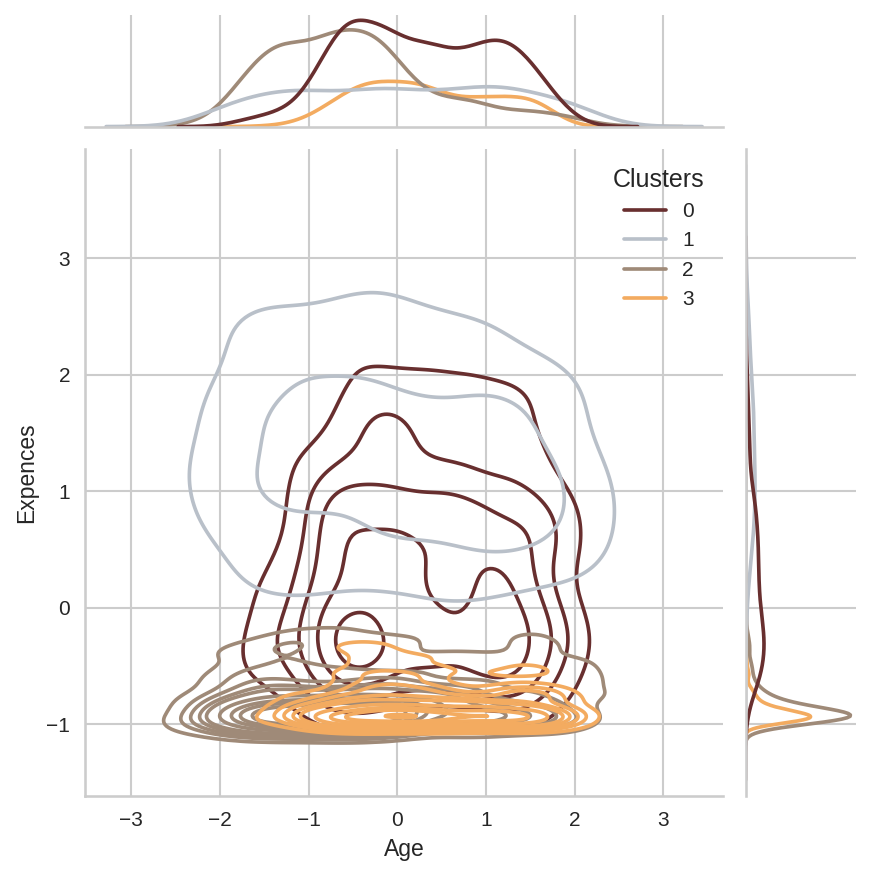

<Figure size 1500x750 with 0 Axes>

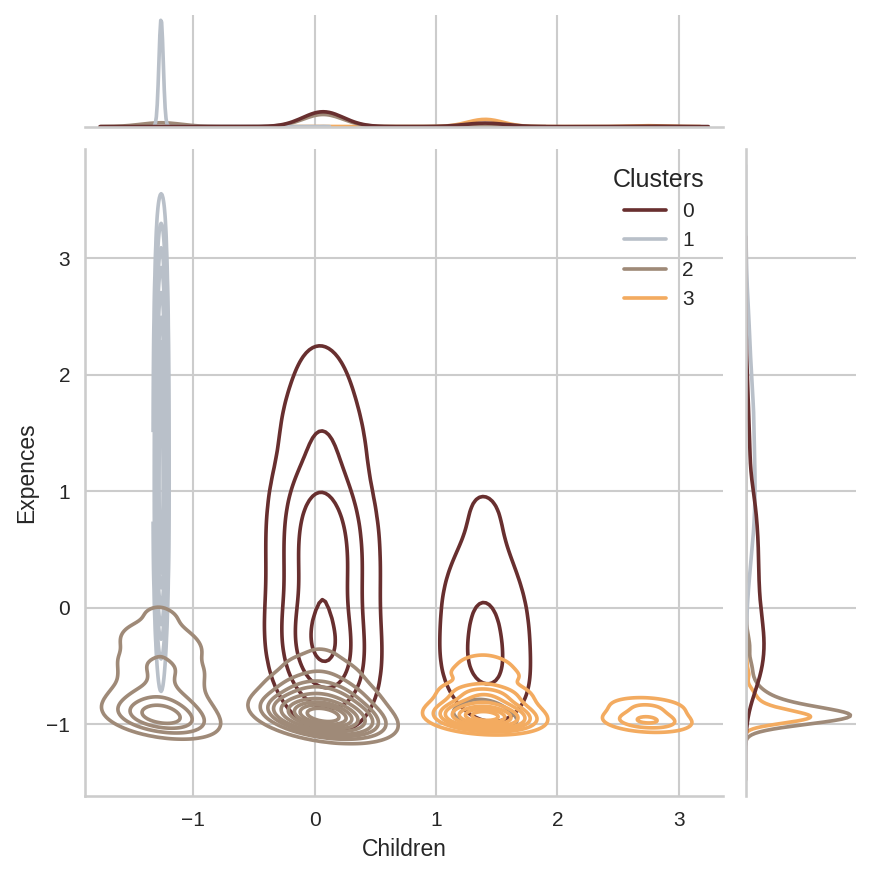

<Figure size 1500x750 with 0 Axes>

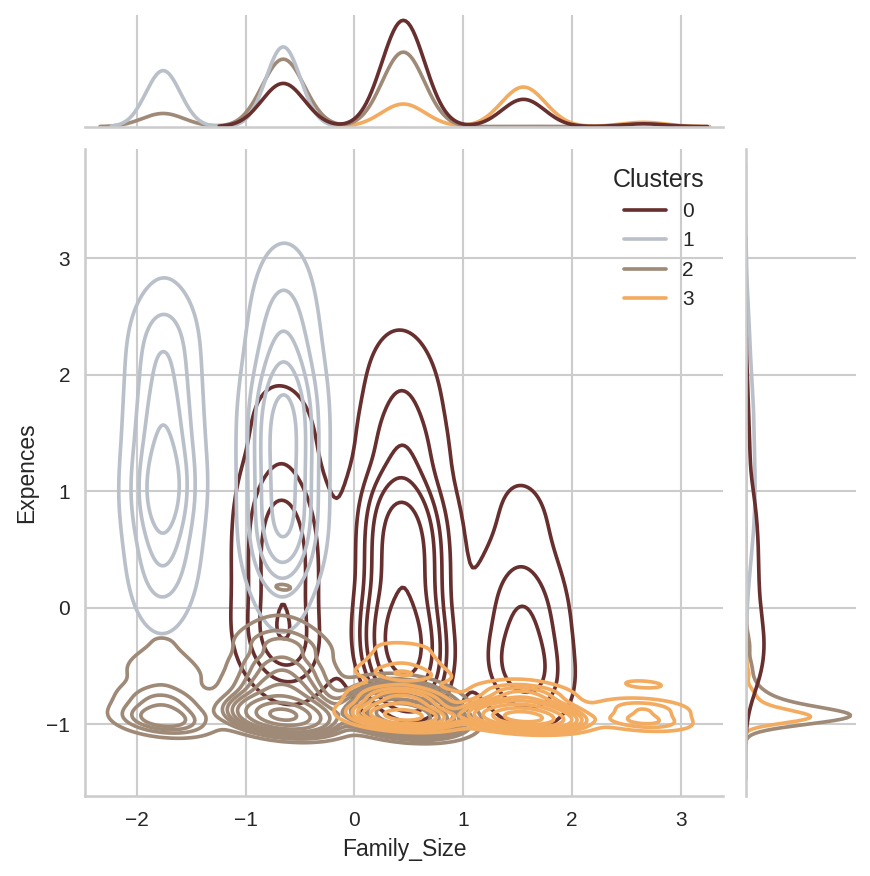

<Figure size 1500x750 with 0 Axes>

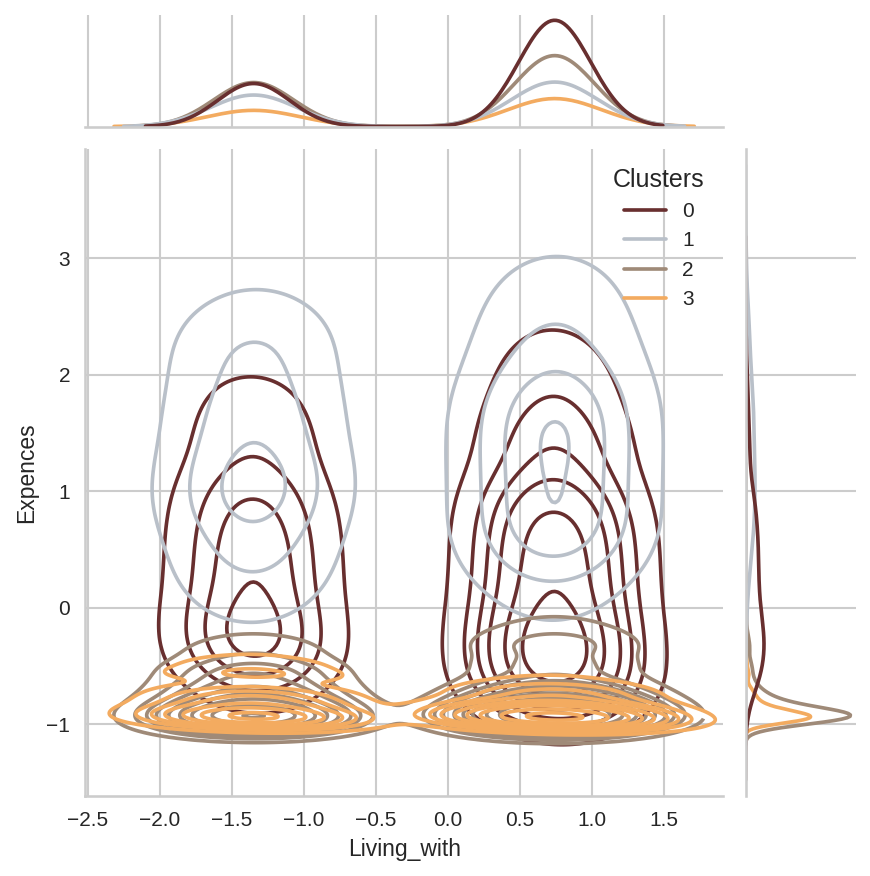

<Figure size 1500x750 with 0 Axes>

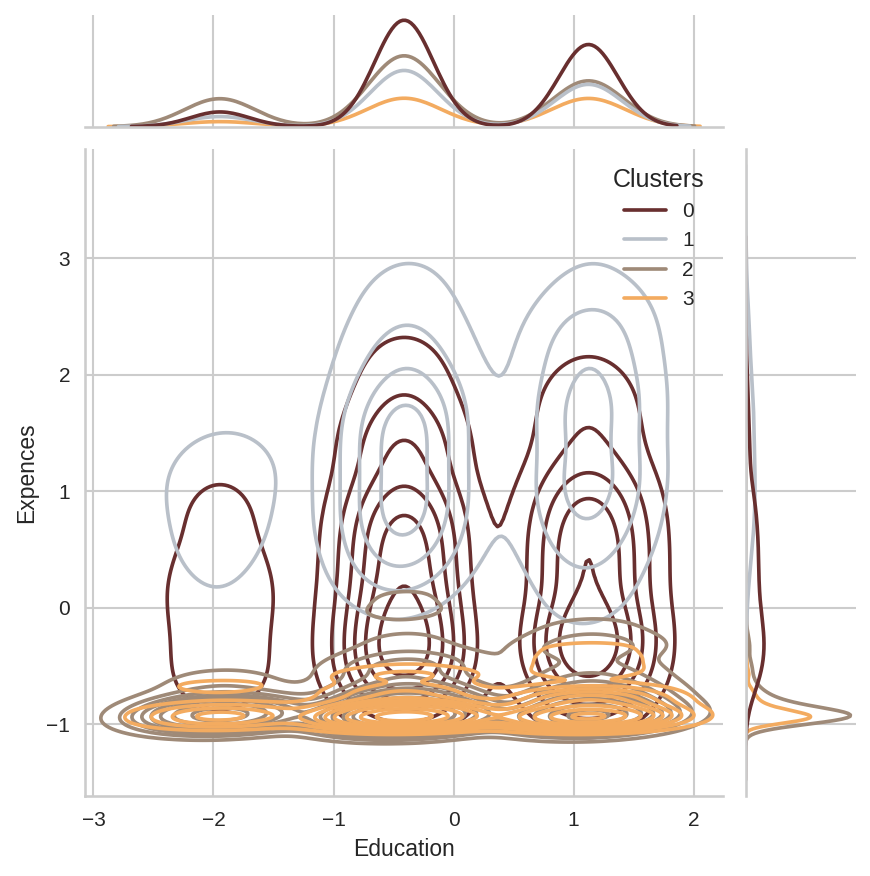

<Figure size 1500x750 with 0 Axes>

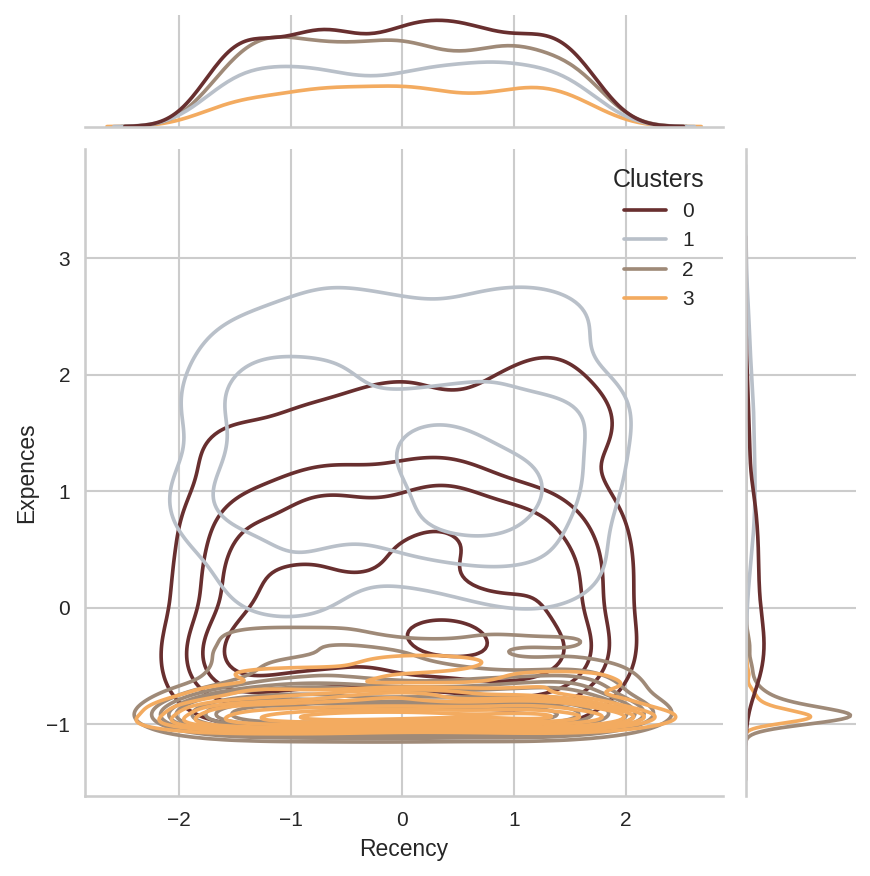

In [ ]:
#identify the personal attributes of the clusters
Personal = ["Age", "Children", "Family_Size", "Living_with", "Education", "Recency"]

for i in Personal:
    plt.figure()
    sns.jointplot(x = df[i], y=df["Expences"], hue = df["Clusters"], kind="kde", palette=pal)
    plt.show()

# SILHOUETTE SCORE FOR CLUSTERING

In [ ]:
si = silhouette_score(df_pca,hc.fit_predict(df_pca))

In [ ]:
si

0.3802234558274758

In [ ]:
df.columns.to_list()

['Education',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'Expences',
 'Living_with',
 'Children',
 'Family_Size',
 'Parents',
 'Clusters']

In [ ]:
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# # Assuming you have your features in X and labels in y

array = df.values
x = array[:,0:-1]
y = array[:,-1]
validation_size = 0.20
seed = 5
x_train , x_validation, y_train, y_validation = train_test_split(x, y, test_size=validation_size, random_state= seed)

In [ ]:
#test options and evaluation matrics
num_folds = 10
seed = 7
scoring = 'accuracy'

#check which algorithm is best

models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB',GaussianNB()))


result = []
name = []

for namess, structure in models:
    kFold = KFold(n_splits=num_folds, random_state= None)
    cv_results = cross_val_score(structure,
                                 x_train,
                                 y_train,
                                 cv=kFold,
                                 scoring=scoring)
    result.append(cv_results)
    name.append(namess)
    msg = "%s: %f (%f)" %(namess, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.971164 (0.011992)
CART: 0.945146 (0.018844)
SVM: 0.966644 (0.010866)
NB: 0.814034 (0.031828)


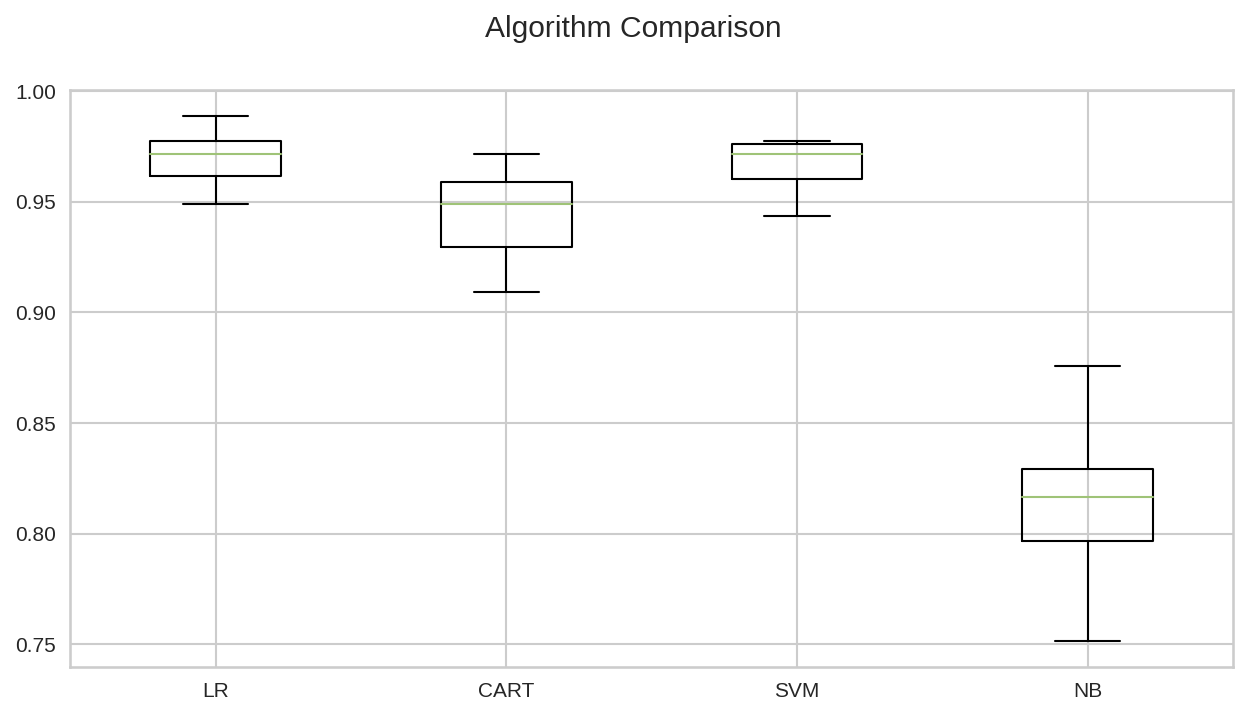

In [ ]:
#compare algorithm

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax1 = fig.add_subplot(111)
pyplot.boxplot(result)
ax1.set_xticklabels(name)
pyplot.show()

In [ ]:
#apply ensemble methods


ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
Headers = []

for name, model in ensembles:
    kFold = KFold(n_splits=num_folds, random_state= None)
    cv_results = cross_val_score(model,
                                 x_train,
                                 y_train,
                                 cv=kFold,
                                 scoring=scoring)
    results.append(cv_results)
    Headers.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.711171 (0.118885)
GBM: 0.967771 (0.013875)
RF: 0.962693 (0.010773)
ET: 0.970599 (0.010681)


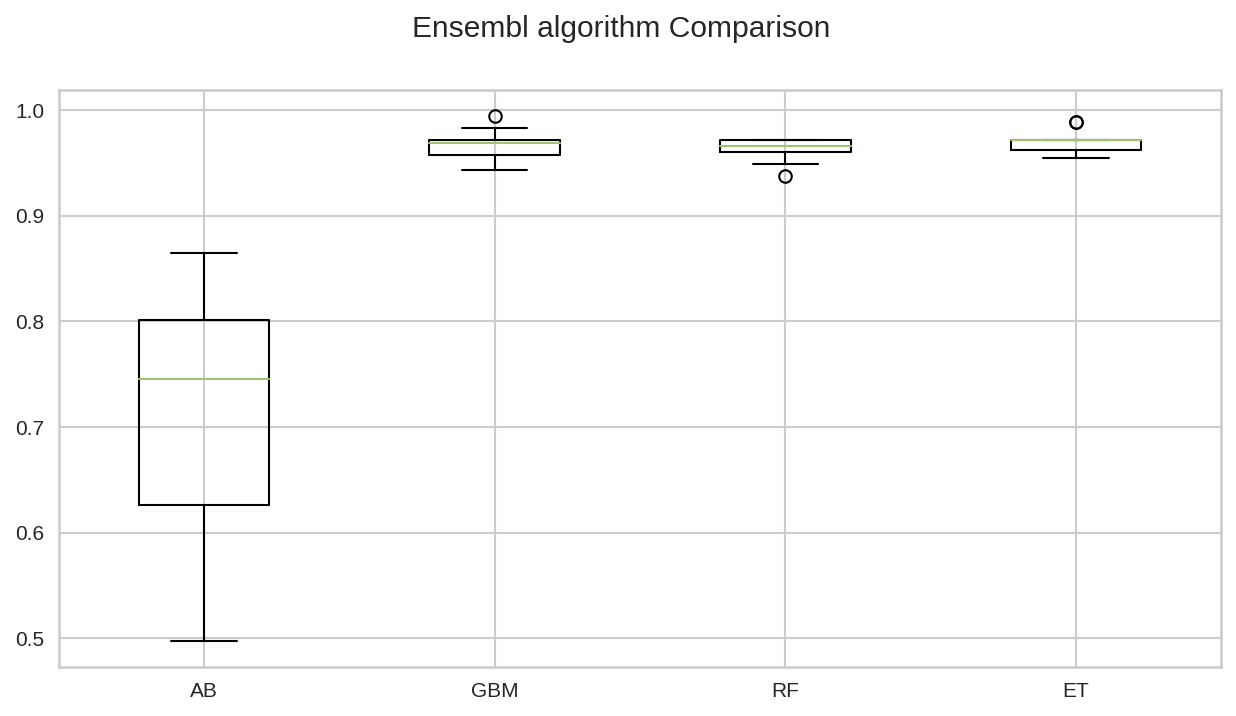

In [ ]:
fig = pyplot.figure()
fig.suptitle('Ensembl algorithm Comparison')
ax2 = fig.add_subplot(111)
pyplot.boxplot(results)
ax2.set_xticklabels(Headers)
pyplot.show()

In [ ]:
# LR: LogisticRegression:         0.971164 (0.011992)
# CART: DecisionTreeClassifier:   0.941757 (0.021225)
# SVM: Support Vector Machine:    0.966644 (0.010866)
# NB: Naive Bayes:                0.814034 (0.031828)
# AB:AdaBoosting:                 0.711171 (0.118885)
# GBM:GradientBoosting:           0.968336 (0.014582)
# RF:RandomForest:                0.962689 (0.011360)
# ET:ExtraTrees:                  0.973430 (0.008774)

# almost all models are best models for dataset but there are chances of getting model overfitted so we can go with some amount of error for best fit
# Thus decided to go with stable model that is Decision Tree having accuracy of 94%

In [ ]:
#estimate accuracy on validation dataset using DecisionTreeClassifier

Method = DecisionTreeClassifier()
Method.fit(x_train, y_train)
final_accuracy = x_validation
predictions = Method.predict(x_validation)
predictions


array([2., 0., 3., 1., 1., 1., 2., 2., 1., 2., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 2., 0., 1., 2., 1., 0., 2., 1., 0., 3., 0., 0., 0., 2.,
       3., 2., 0., 3., 2., 1., 1., 2., 2., 0., 0., 0., 2., 3., 0., 2., 1.,
       0., 3., 2., 0., 0., 2., 1., 1., 3., 0., 2., 1., 1., 2., 0., 0., 1.,
       2., 1., 2., 1., 1., 2., 1., 1., 3., 2., 0., 1., 1., 2., 0., 3., 0.,
       0., 0., 2., 2., 1., 3., 3., 0., 0., 0., 0., 2., 0., 1., 0., 1., 1.,
       1., 0., 3., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 3., 0., 3., 2.,
       0., 2., 0., 2., 1., 1., 3., 2., 1., 0., 0., 2., 2., 2., 1., 1., 1.,
       1., 2., 1., 0., 0., 2., 2., 1., 2., 2., 0., 0., 2., 2., 2., 2., 2.,
       2., 3., 0., 0., 0., 2., 0., 2., 2., 1., 0., 1., 1., 3., 0., 1., 2.,
       0., 3., 1., 0., 0., 0., 3., 2., 2., 3., 0., 2., 1., 0., 1., 0., 2.,
       2., 0., 2., 3., 3., 0., 3., 2., 3., 0., 0., 0., 3., 3., 3., 2., 2.,
       2., 2., 0., 0., 1., 2., 3., 2., 1., 0., 0., 0., 1., 1., 0., 0., 2.,
       0., 0., 3., 3., 0.

In [ ]:
print(accuracy_score(y_validation, predictions))

0.9345372460496614


# SVM MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn import metrics

svc = SVC()
svc.fit(x_train, y_train)
# make predictions
prediction = svc.predict(x_validation)
# summarize the fit of the model
print(metrics.classification_report(y_validation, prediction))
print(metrics.confusion_matrix(y_validation, prediction))

print("Accuracy:",metrics.accuracy_score(y_validation, prediction))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       167
         1.0       0.98      1.00      0.99        90
         2.0       0.98      0.94      0.96       127
         3.0       0.88      0.98      0.93        59

    accuracy                           0.97       443
   macro avg       0.96      0.97      0.96       443
weighted avg       0.97      0.97      0.97       443

[[161   0   3   3]
 [  0  90   0   0]
 [  0   2 120   5]
 [  1   0   0  58]]
Accuracy: 0.9683972911963883


# SVM model with Hyper Parameters

In [ ]:
model = SVC(kernel='rbf',gamma=0.0001, C=1)

In [ ]:
model.fit(x_train, y_train)
# make predictions
prediction = model.predict(x_validation)
# summarize the fit of the model
print(metrics.classification_report(y_validation, prediction))
print(metrics.confusion_matrix(y_validation, prediction))
print("Accuracy:",metrics.accuracy_score(y_validation, prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93       167
         1.0       0.99      1.00      0.99        90
         2.0       0.63      0.98      0.76       127
         3.0       0.00      0.00      0.00        59

    accuracy                           0.82       443
   macro avg       0.65      0.72      0.67       443
weighted avg       0.75      0.82      0.77       443

[[149   0  18   0]
 [  0  90   0   0]
 [  2   1 124   0]
 [  3   0  56   0]]
Accuracy: 0.8194130925507901


## Model with Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9717321520287623)

# Final SVM model

In [ ]:
final_model = SVC(C= 15, gamma = 50, kernel = 'linear')
final_model.fit(x_train, y_train)

prediction = final_model.predict(x_validation)

print(metrics.classification_report(y_validation, prediction))
print(metrics.confusion_matrix(y_validation, prediction))
print("Accuracy:",metrics.accuracy_score(y_validation, prediction))


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       167
         1.0       0.98      0.99      0.98        90
         2.0       0.99      0.97      0.98       127
         3.0       0.90      0.93      0.92        59

    accuracy                           0.97       443
   macro avg       0.96      0.96      0.96       443
weighted avg       0.97      0.97      0.97       443

[[162   1   0   4]
 [  1  89   0   0]
 [  1   1 123   2]
 [  3   0   1  55]]
Accuracy: 0.9683972911963883


# Random Forests

In [132]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9638233255880315
